# Q-Learning Grid World avec Paramètres Configurables

Ce notebook implémente un environnement Grid World avec Q-Learning, permettant de configurer:
- Taille de la grille (4x4 à 10x10)
- Position du goal (rouge)
- Position des obstacles
- Agent en vert
- Visualisation de la convergence
- Sauvegarde des Q-values

## 1. Import des Bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from typing import Tuple, List, Optional
from IPython.display import clear_output
import time


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Mouhcine\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    s

AttributeError: _ARRAY_API not found

## 2. Environnement Grid World Paramétrable

In [2]:
class ParameterableGridWorld:
    """
    Environnement Grid World avec paramètres configurables
    
    Paramètres:
    - grid_size: taille de la grille (4 à 10)
    - goal_position: position du goal (tuple)
    - obstacles: liste des positions d'obstacles
    - start_position: position de départ de l'agent
    """
    
    def __init__(self, 
                 grid_size: int = 5,
                 goal_position: Tuple[int, int] = None,
                 obstacles: List[Tuple[int, int]] = None,
                 start_position: Tuple[int, int] = None):
        
        # Validation de la taille de la grille
        if grid_size < 4 or grid_size > 10:
            raise ValueError("La taille de la grille doit être entre 4 et 10")
        
        self.grid_size = grid_size
        
        # Position par défaut du goal (coin inférieur droit)
        if goal_position is None:
            self.goal_position = (grid_size - 1, grid_size - 1)
        else:
            self.goal_position = goal_position
        
        # Position de départ par défaut (coin supérieur gauche)
        if start_position is None:
            self.start_position = (0, 0)
        else:
            self.start_position = start_position
        
        # Obstacles par défaut
        if obstacles is None:
            self.obstacles = []
        else:
            self.obstacles = obstacles
        
        # Validation: le goal et le start ne doivent pas être des obstacles
        if self.goal_position in self.obstacles:
            raise ValueError("Le goal ne peut pas être un obstacle")
        if self.start_position in self.obstacles:
            raise ValueError("La position de départ ne peut pas être un obstacle")
        
        # Actions possibles: 0=haut, 1=bas, 2=gauche, 3=droite
        self.actions = [0, 1, 2, 3]
        self.action_effects = {
            0: (-1, 0),  # haut
            1: (1, 0),   # bas
            2: (0, -1),  # gauche
            3: (0, 1)    # droite
        }
        self.action_names = ['↑', '↓', '←', '→']
        
        # État actuel
        self.current_position = self.start_position
        
    def reset(self) -> Tuple[int, int]:
        """Réinitialise l'environnement"""
        self.current_position = self.start_position
        return self.current_position
    
    def step(self, action: int) -> Tuple[Tuple[int, int], float, bool]:
        """
        Exécute une action
        
        Returns:
            next_state: nouvelle position
            reward: récompense
            done: si l'épisode est terminé
        """
        # Calculer la nouvelle position
        effect = self.action_effects[action]
        new_row = self.current_position[0] + effect[0]
        new_col = self.current_position[1] + effect[1]
        new_position = (new_row, new_col)
        
        # Vérifier si la nouvelle position est valide
        if not self._is_valid_position(new_position):
            # Rester à la même position (collision avec mur ou obstacle)
            reward = -1.0
            done = False
            return self.current_position, reward, done
        
        # Mise à jour de la position
        self.current_position = new_position
        
        # Vérifier si on a atteint le goal
        if self.current_position == self.goal_position:
            reward = 100.0
            done = True
        else:
            reward = -0.1  # Petite pénalité pour encourager l'efficacité
            done = False
        
        return self.current_position, reward, done
    
    def _is_valid_position(self, position: Tuple[int, int]) -> bool:
        """Vérifie si une position est valide"""
        row, col = position
        
        # Vérifier les limites de la grille
        if row < 0 or row >= self.grid_size or col < 0 or col >= self.grid_size:
            return False
        
        # Vérifier les obstacles
        if position in self.obstacles:
            return False
        
        return True
    
    def render(self, q_values: np.ndarray = None, show_values: bool = False):
        """
        Visualise l'environnement
        
        - Agent en VERT
        - Goal en ROUGE
        - Obstacles en NOIR
        """
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        
        # Créer la grille
        for i in range(self.grid_size + 1):
            ax.plot([0, self.grid_size], [i, i], 'k-', linewidth=1)
            ax.plot([i, i], [0, self.grid_size], 'k-', linewidth=1)
        
        # Dessiner les obstacles (noir)
        for obs in self.obstacles:
            rect = patches.Rectangle((obs[1], self.grid_size - obs[0] - 1), 
                                     1, 1, linewidth=1, 
                                     edgecolor='black', facecolor='black')
            ax.add_patch(rect)
        
        # Dessiner le goal (rouge)
        goal_rect = patches.Rectangle((self.goal_position[1], 
                                      self.grid_size - self.goal_position[0] - 1), 
                                     1, 1, linewidth=2, 
                                     edgecolor='darkred', facecolor='red', alpha=0.7)
        ax.add_patch(goal_rect)
        ax.text(self.goal_position[1] + 0.5, 
               self.grid_size - self.goal_position[0] - 0.5,
               'GOAL', ha='center', va='center', 
               fontsize=10, fontweight='bold', color='white')
        
        # Dessiner l'agent (vert)
        agent_rect = patches.Circle((self.current_position[1] + 0.5, 
                                    self.grid_size - self.current_position[0] - 0.5), 
                                   0.3, linewidth=2, 
                                   edgecolor='darkgreen', facecolor='green', alpha=0.8)
        ax.add_patch(agent_rect)
        
        # Afficher les Q-values si demandé
        if show_values and q_values is not None:
            for i in range(self.grid_size):
                for j in range(self.grid_size):
                    if (i, j) not in self.obstacles and (i, j) != self.goal_position:
                        # Trouver la meilleure action
                        state_idx = i * self.grid_size + j
                        best_action = np.argmax(q_values[state_idx])
                        max_q = np.max(q_values[state_idx])
                        
                        # Afficher la flèche de la meilleure action
                        arrow = self.action_names[best_action]
                        ax.text(j + 0.5, self.grid_size - i - 0.5, 
                               f'{arrow}\n{max_q:.1f}',
                               ha='center', va='center', 
                               fontsize=8, color='blue')
        
        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)
        ax.set_aspect('equal')
        ax.axis('off')
        plt.title(f'Grid World {self.grid_size}x{self.grid_size}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def get_state_index(self, position: Tuple[int, int]) -> int:
        """Convertit une position en index d'état"""
        return position[0] * self.grid_size + position[1]
    
    def get_position_from_index(self, index: int) -> Tuple[int, int]:
        """Convertit un index d'état en position"""
        row = index // self.grid_size
        col = index % self.grid_size
        return (row, col)

## 3. Algorithme Q-Learning

In [3]:
class QLearningAgent:
    """
    Agent utilisant l'algorithme Q-Learning
    """
    
    def __init__(self, 
                 n_states: int,
                 n_actions: int,
                 learning_rate: float = 0.1,
                 discount_factor: float = 0.95,
                 epsilon: float = 1.0,
                 epsilon_decay: float = 0.995,
                 epsilon_min: float = 0.01):
        
        self.n_states = n_states
        self.n_actions = n_actions
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        
        # Initialiser la Q-table
        self.q_table = np.zeros((n_states, n_actions))
        
    def choose_action(self, state_idx: int) -> int:
        """Choisit une action avec stratégie epsilon-greedy"""
        if np.random.random() < self.epsilon:
            # Exploration: action aléatoire
            return np.random.choice(self.n_actions)
        else:
            # Exploitation: meilleure action
            return np.argmax(self.q_table[state_idx])
    
    def update(self, state_idx: int, action: int, reward: float, 
               next_state_idx: int, done: bool):
        """Met à jour la Q-table selon l'algorithme Q-Learning"""
        
        # Q-Learning update rule
        current_q = self.q_table[state_idx, action]
        
        if done:
            # Si l'épisode est terminé, pas de valeur future
            target_q = reward
        else:
            # Sinon, utiliser la meilleure valeur Q du prochain état
            max_next_q = np.max(self.q_table[next_state_idx])
            target_q = reward + self.gamma * max_next_q
        
        # Mise à jour
        self.q_table[state_idx, action] = current_q + self.lr * (target_q - current_q)
    
    def decay_epsilon(self):
        """Réduit epsilon pour diminuer l'exploration au fil du temps"""
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)
    
    def get_q_table(self) -> np.ndarray:
        """Retourne la Q-table"""
        return self.q_table.copy()

## 4. Fonction d'Entraînement

In [4]:
def train_q_learning(env: ParameterableGridWorld,
                     agent: QLearningAgent,
                     n_episodes: int = 1000,
                     max_steps: int = 100,
                     verbose: bool = True) -> Tuple[List[float], List[int]]:
    """
    Entraîne l'agent avec Q-Learning
    
    Returns:
        rewards_history: historique des récompenses cumulées par épisode
        steps_history: historique du nombre de pas par épisode
    """
    
    rewards_history = []
    steps_history = []
    
    for episode in range(n_episodes):
        state = env.reset()
        state_idx = env.get_state_index(state)
        
        total_reward = 0
        steps = 0
        done = False
        
        while not done and steps < max_steps:
            # Choisir une action
            action = agent.choose_action(state_idx)
            
            # Exécuter l'action
            next_state, reward, done = env.step(action)
            next_state_idx = env.get_state_index(next_state)
            
            # Mettre à jour la Q-table
            agent.update(state_idx, action, reward, next_state_idx, done)
            
            # Transition vers le prochain état
            state = next_state
            state_idx = next_state_idx
            
            total_reward += reward
            steps += 1
        
        # Décrémenter epsilon
        agent.decay_epsilon()
        
        # Enregistrer les statistiques
        rewards_history.append(total_reward)
        steps_history.append(steps)
        
        # Affichage périodique
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_history[-100:])
            avg_steps = np.mean(steps_history[-100:])
            print(f"Épisode {episode + 1}/{n_episodes} | "
                  f"Récompense moyenne: {avg_reward:.2f} | "
                  f"Pas moyens: {avg_steps:.1f} | "
                  f"Epsilon: {agent.epsilon:.3f}")
    
    return rewards_history, steps_history

## 5. Fonction de Visualisation de la Convergence

In [5]:
def plot_convergence(rewards_history: List[float], 
                    steps_history: List[int],
                    window: int = 50):
    """
    Affiche les courbes de convergence
    
    - Récompense cumulée au cours du temps
    - Nombre de pas par épisode
    """
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Calculer les moyennes mobiles
    rewards_ma = pd.Series(rewards_history).rolling(window=window, min_periods=1).mean()
    steps_ma = pd.Series(steps_history).rolling(window=window, min_periods=1).mean()
    
    # Graphique 1: Récompense cumulée
    axes[0].plot(rewards_history, alpha=0.3, label='Récompense par épisode')
    axes[0].plot(rewards_ma, linewidth=2, label=f'Moyenne mobile ({window} épisodes)')
    axes[0].set_xlabel('Épisode', fontsize=12)
    axes[0].set_ylabel('Récompense Cumulée', fontsize=12)
    axes[0].set_title('Convergence de la Récompense Cumulée', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Graphique 2: Nombre de pas
    axes[1].plot(steps_history, alpha=0.3, label='Pas par épisode')
    axes[1].plot(steps_ma, linewidth=2, label=f'Moyenne mobile ({window} épisodes)')
    axes[1].set_xlabel('Épisode', fontsize=12)
    axes[1].set_ylabel('Nombre de Pas', fontsize=12)
    axes[1].set_title('Convergence du Nombre de Pas', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 6. Fonction pour Sauvegarder les Q-Values

In [6]:
def save_q_values(q_table: np.ndarray, 
                 grid_size: int,
                 filename: str = 'q_values.csv'):
    """
    Sauvegarde les Q-values dans un fichier CSV
    """
    
    # Créer un DataFrame avec les Q-values
    action_names = ['Q_Up', 'Q_Down', 'Q_Left', 'Q_Right']
    
    data = []
    for state_idx in range(q_table.shape[0]):
        row = state_idx // grid_size
        col = state_idx % grid_size
        
        row_data = {
            'State_Index': state_idx,
            'Row': row,
            'Col': col,
            'Q_Up': q_table[state_idx, 0],
            'Q_Down': q_table[state_idx, 1],
            'Q_Left': q_table[state_idx, 2],
            'Q_Right': q_table[state_idx, 3],
            'Best_Action': np.argmax(q_table[state_idx]),
            'Max_Q_Value': np.max(q_table[state_idx])
        }
        data.append(row_data)
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Q-values sauvegardés dans '{filename}'")
    
    return df

def display_q_table_summary(df: pd.DataFrame, n_rows: int = 10):
    """Affiche un résumé de la Q-table"""
    print("\n" + "="*80)
    print("RÉSUMÉ DE LA Q-TABLE")
    print("="*80)
    print(f"\nPremières {n_rows} lignes:")
    print(df.head(n_rows).to_string(index=False))
    print(f"\n\nStatistiques des Q-values:")
    print(df[['Q_Up', 'Q_Down', 'Q_Left', 'Q_Right', 'Max_Q_Value']].describe())

## 7. Exemple 1: Grille 5x5 avec Obstacles

EXEMPLE 1: Grille 5x5 avec Obstacles

Environnement initial:


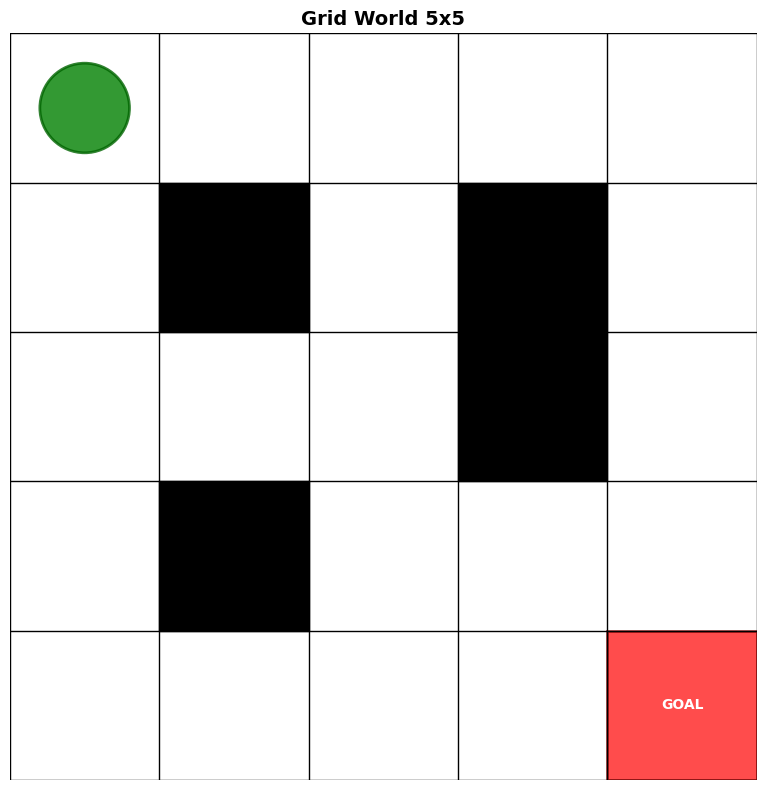


Entraînement en cours...
Épisode 100/1000 | Récompense moyenne: 79.39 | Pas moyens: 36.4 | Epsilon: 0.606
Épisode 200/1000 | Récompense moyenne: 95.61 | Pas moyens: 15.5 | Epsilon: 0.367
Épisode 300/1000 | Récompense moyenne: 97.65 | Pas moyens: 11.2 | Epsilon: 0.222
Épisode 400/1000 | Récompense moyenne: 98.41 | Pas moyens: 10.0 | Epsilon: 0.135
Épisode 500/1000 | Récompense moyenne: 98.91 | Pas moyens: 8.8 | Epsilon: 0.082
Épisode 600/1000 | Récompense moyenne: 99.06 | Pas moyens: 8.5 | Epsilon: 0.049
Épisode 700/1000 | Récompense moyenne: 99.13 | Pas moyens: 8.3 | Epsilon: 0.030
Épisode 800/1000 | Récompense moyenne: 99.21 | Pas moyens: 8.2 | Epsilon: 0.018
Épisode 900/1000 | Récompense moyenne: 99.24 | Pas moyens: 8.1 | Epsilon: 0.011
Épisode 1000/1000 | Récompense moyenne: 99.27 | Pas moyens: 8.1 | Epsilon: 0.010

✓ Entraînement terminé!


In [7]:
print("="*80)
print("EXEMPLE 1: Grille 5x5 avec Obstacles")
print("="*80)

# Créer l'environnement
obstacles_5x5 = [(1, 1), (1, 3), (2, 3), (3, 1)]
env_5x5 = ParameterableGridWorld(
    grid_size=5,
    goal_position=(4, 4),
    obstacles=obstacles_5x5,
    start_position=(0, 0)
)

# Visualiser l'environnement initial
print("\nEnvironnement initial:")
env_5x5.render()

# Créer l'agent Q-Learning
n_states = 5 * 5
n_actions = 4
agent_5x5 = QLearningAgent(
    n_states=n_states,
    n_actions=n_actions,
    learning_rate=0.1,
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01
)

# Entraîner l'agent
print("\nEntraînement en cours...")
rewards_5x5, steps_5x5 = train_q_learning(
    env=env_5x5,
    agent=agent_5x5,
    n_episodes=1000,
    max_steps=100,
    verbose=True
)

print("\n✓ Entraînement terminé!")

## 8. Visualisation de la Convergence (5x5)

Courbes de convergence pour la grille 5x5:


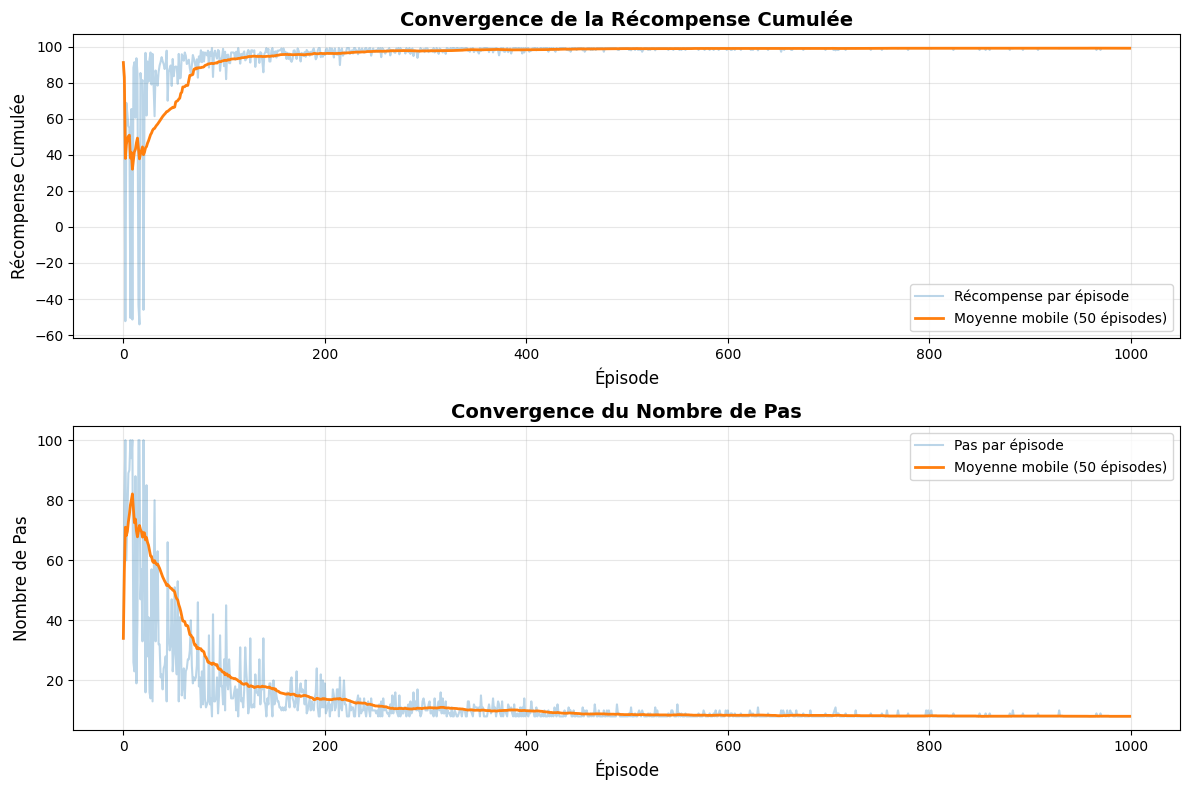

In [8]:
print("Courbes de convergence pour la grille 5x5:")
plot_convergence(rewards_5x5, steps_5x5, window=50)

## 9. Politique Apprise (5x5)

Politique apprise avec les Q-values:


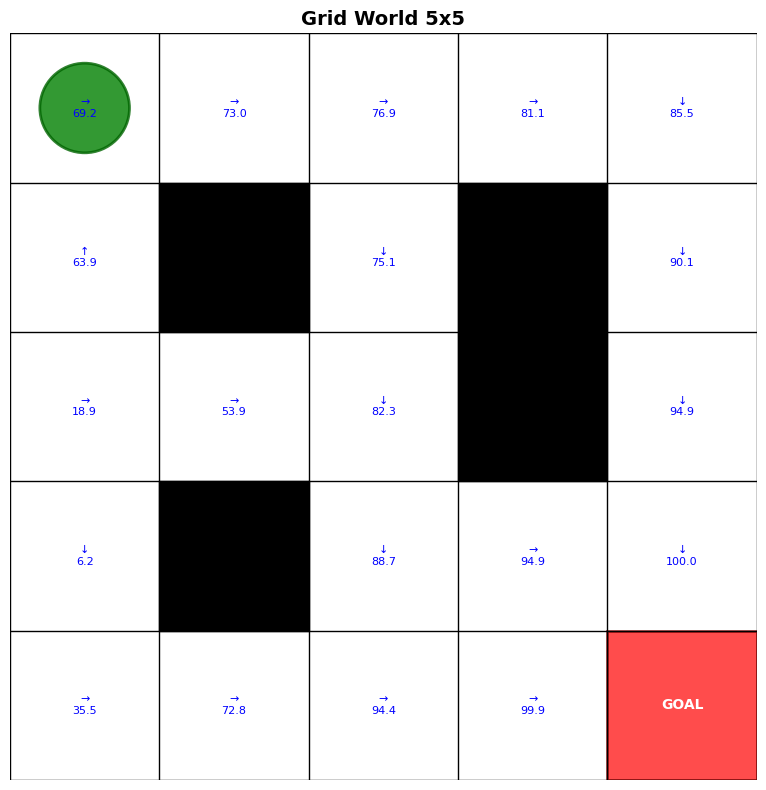

In [9]:
print("Politique apprise avec les Q-values:")
env_5x5.reset()
env_5x5.render(q_values=agent_5x5.get_q_table(), show_values=True)

## 10. Sauvegarde des Q-Values (5x5)

In [10]:
# Sauvegarder les Q-values
df_q_values_5x5 = save_q_values(
    agent_5x5.get_q_table(), 
    grid_size=5,
    filename='q_values_5x5.csv'
)

# Afficher un résumé
display_q_table_summary(df_q_values_5x5, n_rows=15)

Q-values sauvegardés dans 'q_values_5x5.csv'

RÉSUMÉ DE LA Q-TABLE

Premières 15 lignes:
 State_Index  Row  Col      Q_Up    Q_Down    Q_Left   Q_Right  Best_Action  Max_Q_Value
           0    0    0 63.710656 54.984736 63.345757 69.230404            3    69.230404
           1    0    1 66.978477 65.819859 64.711995 72.979373            3    72.979373
           2    0    2 71.614846 66.794528 67.623597 76.925656            3    76.925656
           3    0    3 75.475679 74.609988 71.211616 81.079637            3    81.079637
           4    0    4 80.157045 85.452250 76.845796 80.111166            1    85.452250
           5    1    0 63.889526  6.615582  6.266996 16.250876            0    63.889526
           6    1    1  0.000000  0.000000  0.000000  0.000000            0     0.000000
           7    1    2 42.949782 75.099211 28.703182 28.059655            1    75.099211
           8    1    3  0.000000  0.000000  0.000000  0.000000            0     0.000000
           9    1    

## 11. Exemple 2: Grille 7x7 avec Plus d'Obstacles


EXEMPLE 2: Grille 7x7 avec Plus d'Obstacles

Environnement initial:


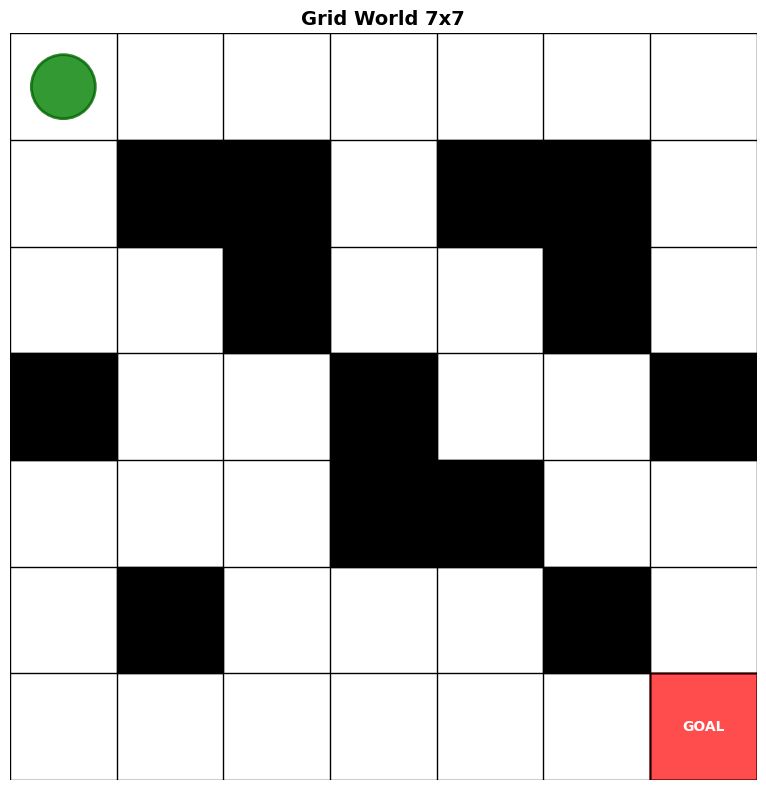


Entraînement en cours...
Épisode 100/1500 | Récompense moyenne: 50.26 | Pas moyens: 71.6 | Epsilon: 0.606
Épisode 200/1500 | Récompense moyenne: 93.94 | Pas moyens: 24.1 | Epsilon: 0.367
Épisode 300/1500 | Récompense moyenne: 96.88 | Pas moyens: 17.1 | Epsilon: 0.222
Épisode 400/1500 | Récompense moyenne: 97.89 | Pas moyens: 14.7 | Epsilon: 0.135
Épisode 500/1500 | Récompense moyenne: 98.49 | Pas moyens: 13.2 | Epsilon: 0.082
Épisode 600/1500 | Récompense moyenne: 98.58 | Pas moyens: 12.9 | Epsilon: 0.049
Épisode 700/1500 | Récompense moyenne: 98.68 | Pas moyens: 12.6 | Epsilon: 0.030
Épisode 800/1500 | Récompense moyenne: 98.79 | Pas moyens: 12.3 | Epsilon: 0.018
Épisode 900/1500 | Récompense moyenne: 98.86 | Pas moyens: 12.1 | Epsilon: 0.011
Épisode 1000/1500 | Récompense moyenne: 98.80 | Pas moyens: 12.2 | Epsilon: 0.010
Épisode 1100/1500 | Récompense moyenne: 98.87 | Pas moyens: 12.1 | Epsilon: 0.010
Épisode 1200/1500 | Récompense moyenne: 98.84 | Pas moyens: 12.1 | Epsilon: 0.010

In [11]:
print("\n" + "="*80)
print("EXEMPLE 2: Grille 7x7 avec Plus d'Obstacles")
print("="*80)

# Créer l'environnement 7x7
obstacles_7x7 = [
    (1, 1), (1, 2), (1, 4), (1, 5),
    (2, 2), (2, 5),
    (3, 0), (3, 3), (3, 6),
    (4, 3), (4, 4),
    (5, 1), (5, 5)
]
env_7x7 = ParameterableGridWorld(
    grid_size=7,
    goal_position=(6, 6),
    obstacles=obstacles_7x7,
    start_position=(0, 0)
)

# Visualiser l'environnement initial
print("\nEnvironnement initial:")
env_7x7.render()

# Créer l'agent Q-Learning
n_states = 7 * 7
agent_7x7 = QLearningAgent(
    n_states=n_states,
    n_actions=n_actions,
    learning_rate=0.1,
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01
)

# Entraîner l'agent
print("\nEntraînement en cours...")
rewards_7x7, steps_7x7 = train_q_learning(
    env=env_7x7,
    agent=agent_7x7,
    n_episodes=1500,
    max_steps=150,
    verbose=True
)

print("\n✓ Entraînement terminé!")

## 12. Visualisation de la Convergence (7x7)

Courbes de convergence pour la grille 7x7:


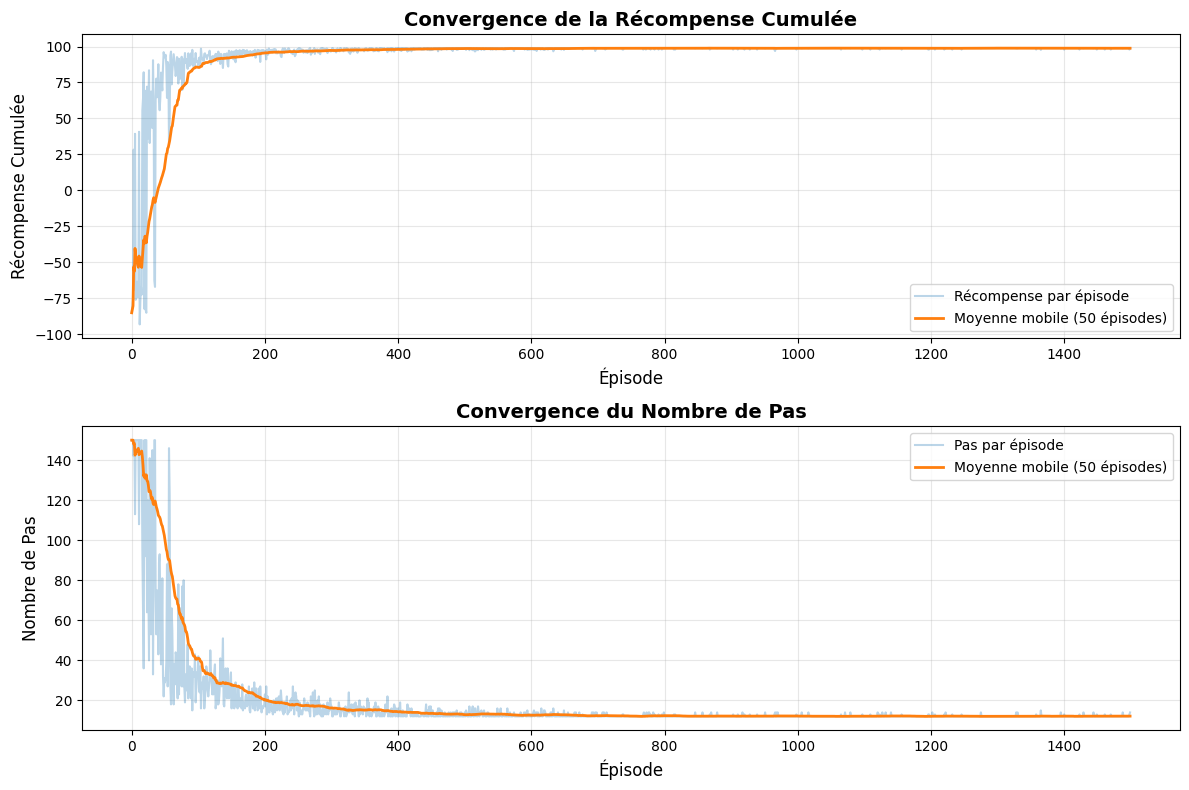

In [12]:
print("Courbes de convergence pour la grille 7x7:")
plot_convergence(rewards_7x7, steps_7x7, window=50)

## 13. Politique Apprise (7x7)

Politique apprise avec les Q-values:


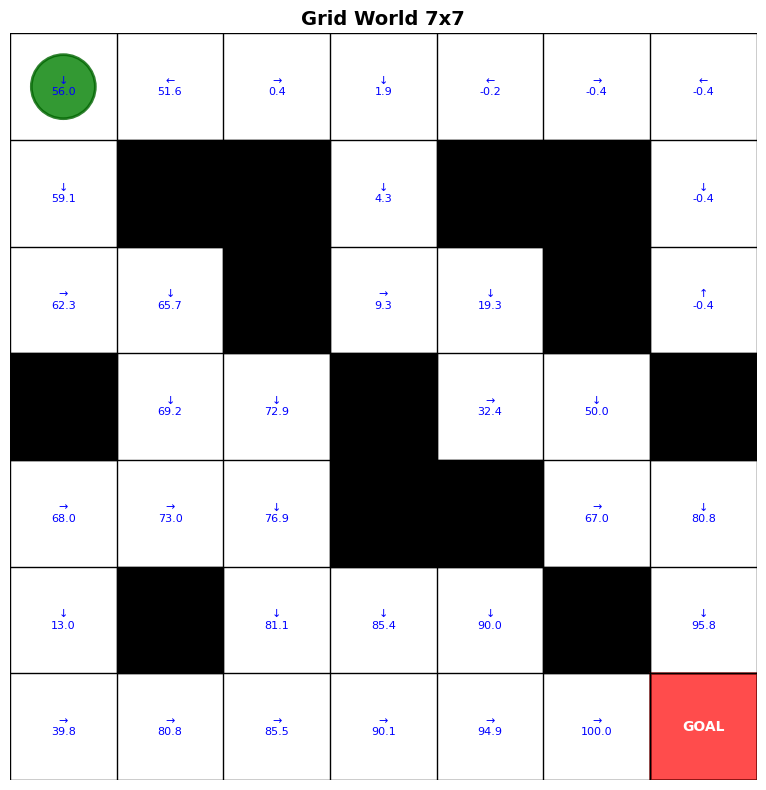

In [13]:
print("Politique apprise avec les Q-values:")
env_7x7.reset()
env_7x7.render(q_values=agent_7x7.get_q_table(), show_values=True)

## 14. Sauvegarde des Q-Values (7x7)

In [14]:
# Sauvegarder les Q-values
df_q_values_7x7 = save_q_values(
    agent_7x7.get_q_table(), 
    grid_size=7,
    filename='q_values_7x7.csv'
)

# Afficher un résumé
display_q_table_summary(df_q_values_7x7, n_rows=20)

Q-values sauvegardés dans 'q_values_7x7.csv'

RÉSUMÉ DE LA Q-TABLE

Premières 20 lignes:
 State_Index  Row  Col      Q_Up    Q_Down    Q_Left   Q_Right  Best_Action  Max_Q_Value
           0    0    0 48.293260 56.017609 49.638913 44.108186            1    56.017609
           1    0    1  6.647462  0.681947 51.630291 -0.293328            2    51.630291
           2    0    2 -1.269598 -1.272844 -0.482641  0.439938            3     0.439938
           3    0    3 -1.045961  1.904425 -0.362096 -0.398947            1     1.904425
           4    0    4 -1.182274 -1.274928 -0.155488 -0.385500            2    -0.155488
           5    0    5 -1.192200 -1.264166 -0.390596 -0.389435            3    -0.389435
           6    0    6 -1.252170 -0.402005 -0.394520 -1.274244            2    -0.394520
           7    1    0 49.696797 59.071168 52.617111 52.324409            1    59.071168
           8    1    1  0.000000  0.000000  0.000000  0.000000            0     0.000000
           9    1    

## 15. Exemple 3: Grille 10x10 (Taille Maximale)


EXEMPLE 3: Grille 10x10 (Taille Maximale)

Environnement initial:


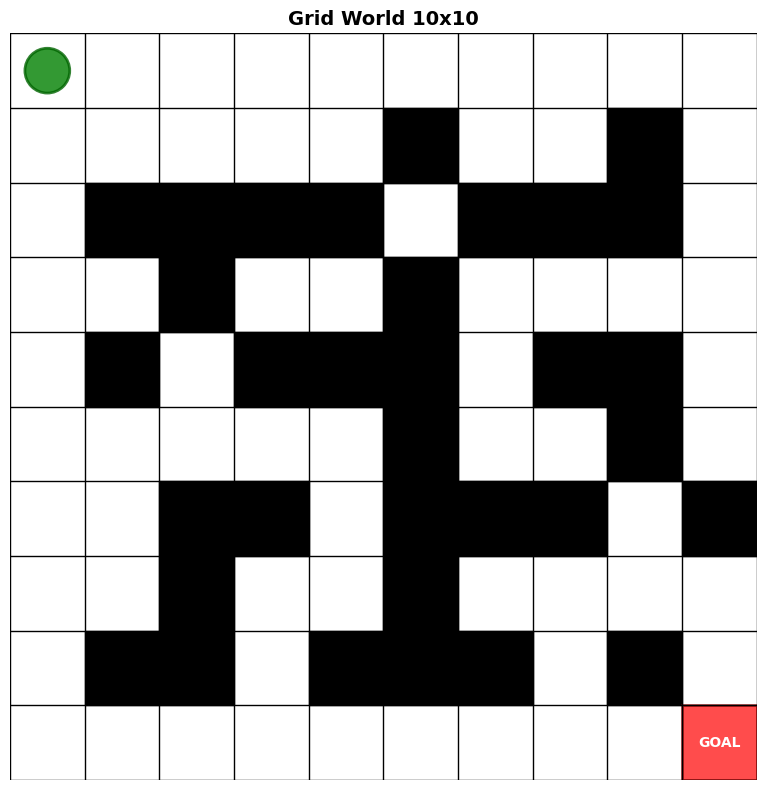


Entraînement en cours...
Épisode 100/2000 | Récompense moyenne: -11.80 | Pas moyens: 149.9 | Epsilon: 0.606
Épisode 200/2000 | Récompense moyenne: 84.75 | Pas moyens: 43.7 | Epsilon: 0.367
Épisode 300/2000 | Récompense moyenne: 94.48 | Pas moyens: 26.9 | Epsilon: 0.222
Épisode 400/2000 | Récompense moyenne: 96.52 | Pas moyens: 21.9 | Epsilon: 0.135
Épisode 500/2000 | Récompense moyenne: 97.27 | Pas moyens: 20.5 | Epsilon: 0.082
Épisode 600/2000 | Récompense moyenne: 97.65 | Pas moyens: 19.2 | Epsilon: 0.049
Épisode 700/2000 | Récompense moyenne: 97.93 | Pas moyens: 18.8 | Epsilon: 0.030
Épisode 800/2000 | Récompense moyenne: 98.10 | Pas moyens: 18.3 | Epsilon: 0.018
Épisode 900/2000 | Récompense moyenne: 98.16 | Pas moyens: 18.3 | Epsilon: 0.011
Épisode 1000/2000 | Récompense moyenne: 98.23 | Pas moyens: 18.3 | Epsilon: 0.010
Épisode 1100/2000 | Récompense moyenne: 98.17 | Pas moyens: 18.3 | Epsilon: 0.010
Épisode 1200/2000 | Récompense moyenne: 98.23 | Pas moyens: 18.2 | Epsilon: 0.0

In [15]:
print("\n" + "="*80)
print("EXEMPLE 3: Grille 10x10 (Taille Maximale)")
print("="*80)

# Créer l'environnement 10x10 avec un labyrinthe
obstacles_10x10 = [
    # Murs horizontaux
    (2, 1), (2, 2), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8),
    (4, 1), (4, 3), (4, 4), (4, 5), (4, 7), (4, 8),
    (6, 2), (6, 3), (6, 5), (6, 6), (6, 7), (6, 9),
    (8, 1), (8, 2), (8, 4), (8, 5), (8, 6), (8, 8),
    # Murs verticaux
    (1, 5), (3, 5), (5, 5), (7, 5),
    (1, 8), (3, 2), (5, 8), (7, 2)
]

env_10x10 = ParameterableGridWorld(
    grid_size=10,
    goal_position=(9, 9),
    obstacles=obstacles_10x10,
    start_position=(0, 0)
)

# Visualiser l'environnement initial
print("\nEnvironnement initial:")
env_10x10.render()

# Créer l'agent Q-Learning
n_states = 10 * 10
agent_10x10 = QLearningAgent(
    n_states=n_states,
    n_actions=n_actions,
    learning_rate=0.1,
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01
)

# Entraîner l'agent (plus d'épisodes pour une grille plus grande)
print("\nEntraînement en cours...")
rewards_10x10, steps_10x10 = train_q_learning(
    env=env_10x10,
    agent=agent_10x10,
    n_episodes=2000,
    max_steps=200,
    verbose=True
)

print("\n✓ Entraînement terminé!")

## 16. Visualisation de la Convergence (10x10)

Courbes de convergence pour la grille 10x10:


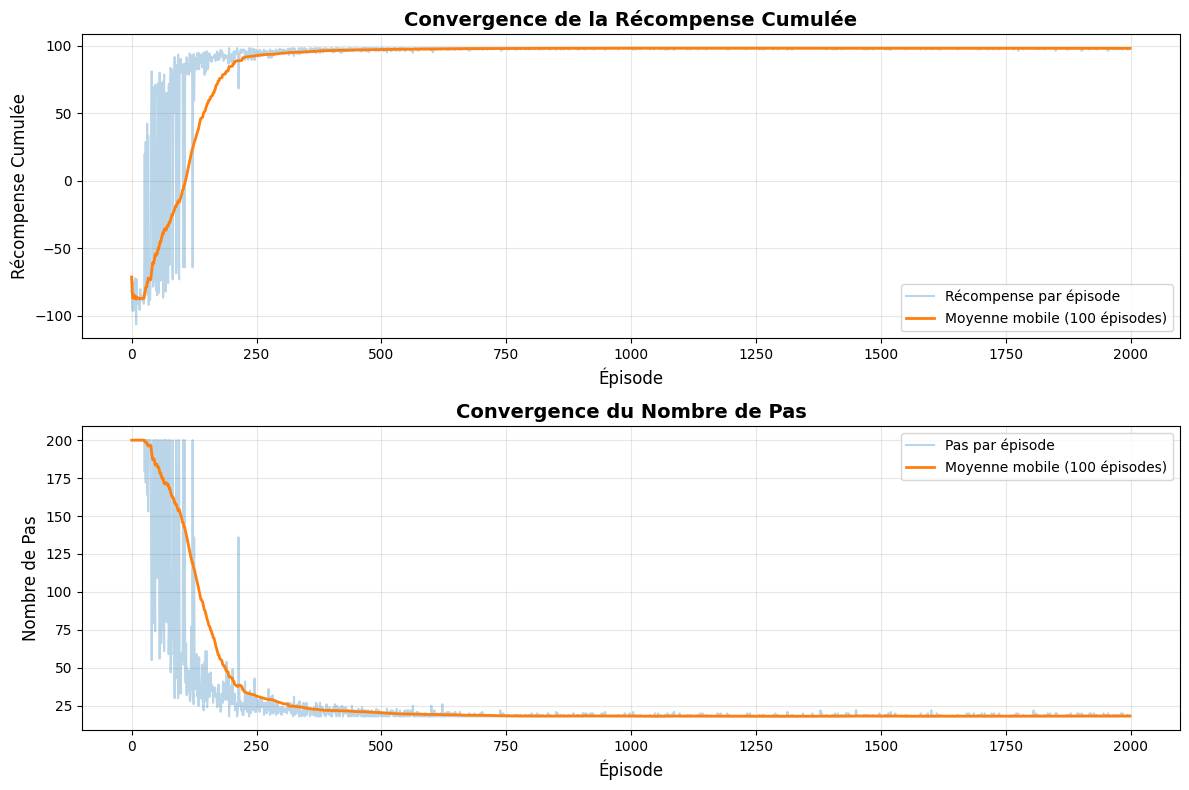

In [16]:
print("Courbes de convergence pour la grille 10x10:")
plot_convergence(rewards_10x10, steps_10x10, window=100)

## 17. Politique Apprise (10x10)

Politique apprise (sans valeurs pour lisibilité):


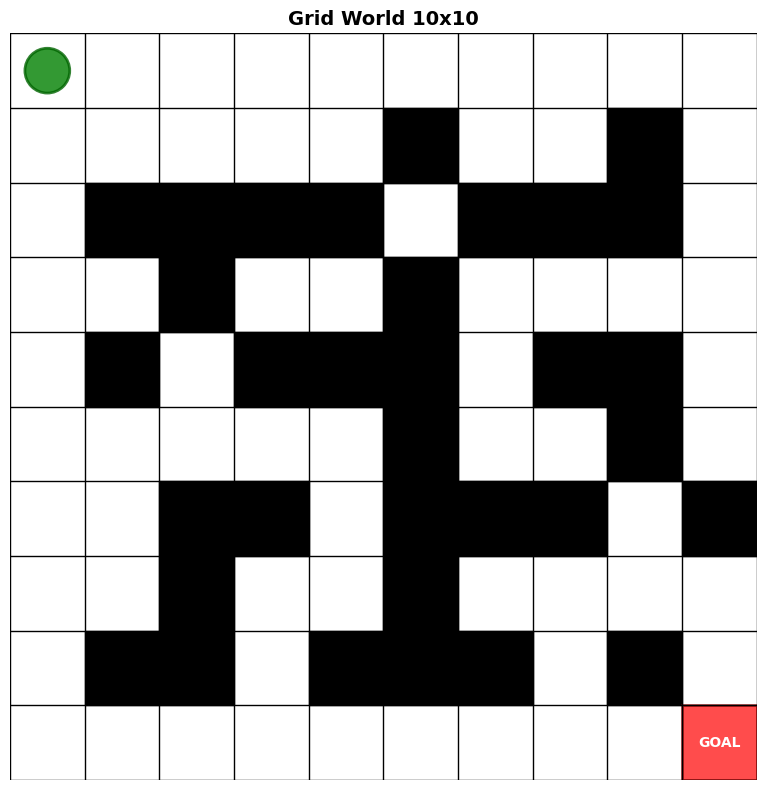


Politique apprise avec Q-values (peut être dense):


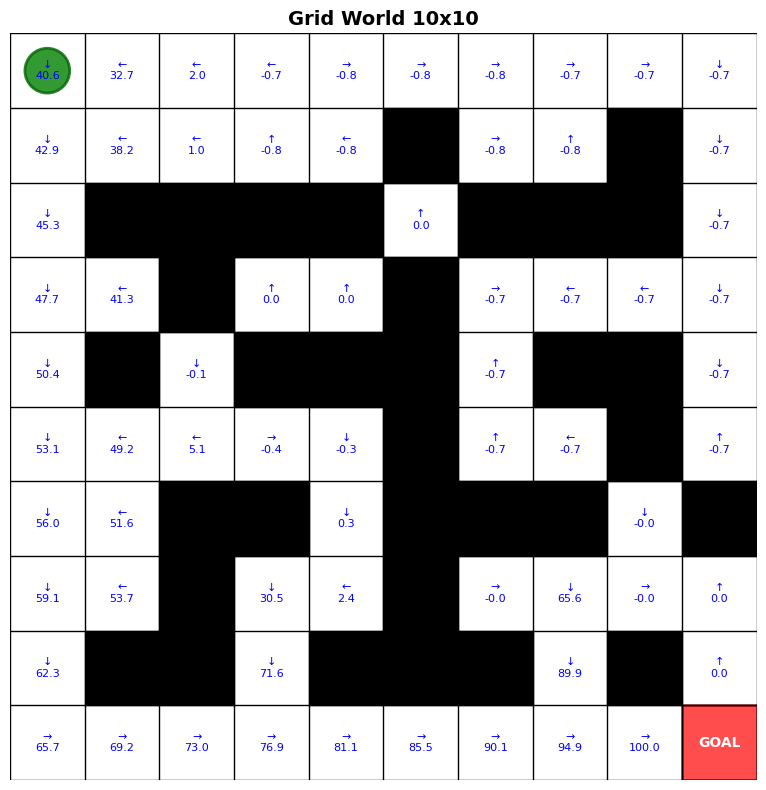

In [17]:
print("Politique apprise (sans valeurs pour lisibilité):")
env_10x10.reset()
env_10x10.render(q_values=agent_10x10.get_q_table(), show_values=False)

print("\nPolitique apprise avec Q-values (peut être dense):")
env_10x10.render(q_values=agent_10x10.get_q_table(), show_values=True)

## 18. Sauvegarde des Q-Values (10x10)

In [18]:
# Sauvegarder les Q-values
df_q_values_10x10 = save_q_values(
    agent_10x10.get_q_table(), 
    grid_size=10,
    filename='q_values_10x10.csv'
)

# Afficher un résumé
display_q_table_summary(df_q_values_10x10, n_rows=25)

Q-values sauvegardés dans 'q_values_10x10.csv'

RÉSUMÉ DE LA Q-TABLE

Premières 25 lignes:
 State_Index  Row  Col      Q_Up    Q_Down    Q_Left   Q_Right  Best_Action  Max_Q_Value
           0    0    0 33.490183 40.648274 34.363687 19.959236            1    40.648274
           1    0    1 -0.509724  1.108104 32.692111 -0.628387            2    32.692111
           2    0    2 -1.609175 -0.675119  1.990296 -0.767645            2     1.990296
           3    0    3 -1.602602 -0.766970 -0.749185 -0.762137            2    -0.749185
           4    0    4 -1.605625 -0.767740 -0.765926 -0.761839            3    -0.761839
           5    0    5 -1.578998 -1.587842 -0.759966 -0.757499            3    -0.757499
           6    0    6 -1.629864 -0.754318 -0.756866 -0.752317            3    -0.752317
           7    0    7 -1.594344 -0.751467 -0.749263 -0.747071            3    -0.747071
           8    0    8 -1.530422 -1.540602 -0.744688 -0.741157            3    -0.741157
           9    0  

## 19. Comparaison des Performances

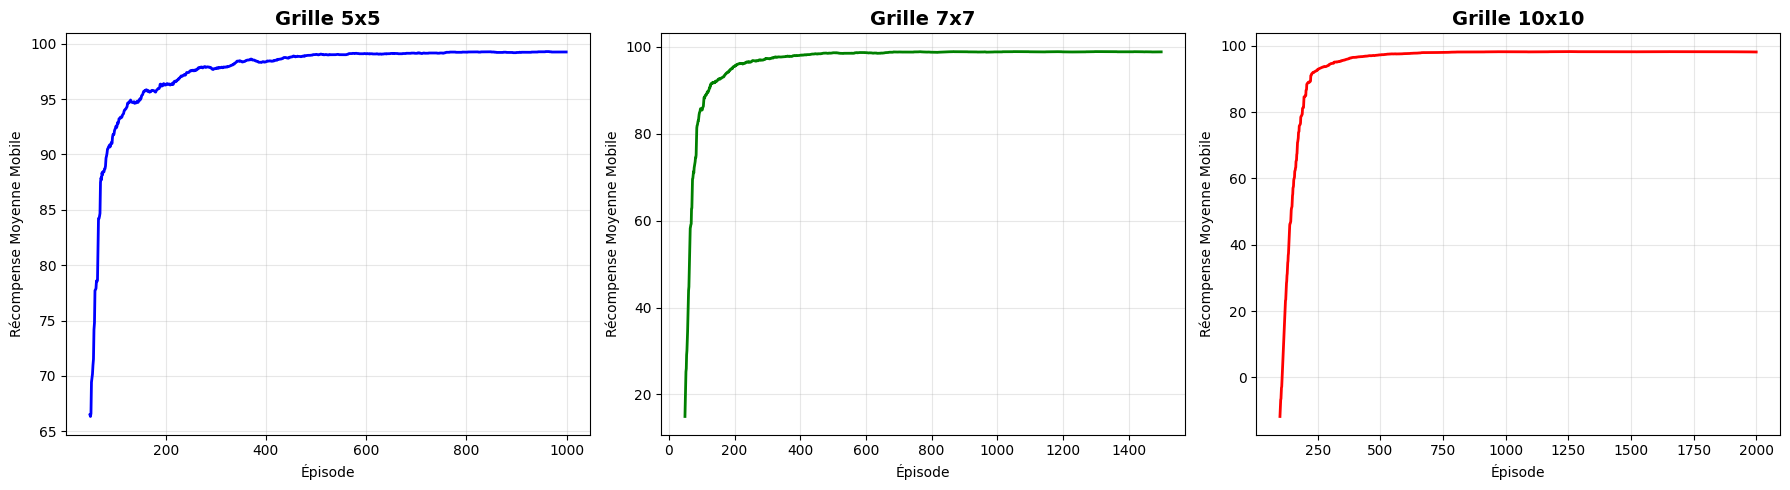


STATISTIQUES FINALES

Grille 5x5:
  - Récompense moyenne (100 derniers épisodes): 99.27
  - Pas moyens (100 derniers épisodes): 8.1

Grille 7x7:
  - Récompense moyenne (100 derniers épisodes): 98.83
  - Pas moyens (100 derniers épisodes): 12.1

Grille 10x10:
  - Récompense moyenne (100 derniers épisodes): 98.14
  - Pas moyens (100 derniers épisodes): 18.3


In [19]:
# Comparer les performances finales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Grille 5x5
axes[0].plot(pd.Series(rewards_5x5).rolling(50).mean(), linewidth=2, color='blue')
axes[0].set_title('Grille 5x5', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Épisode')
axes[0].set_ylabel('Récompense Moyenne Mobile')
axes[0].grid(True, alpha=0.3)

# Grille 7x7
axes[1].plot(pd.Series(rewards_7x7).rolling(50).mean(), linewidth=2, color='green')
axes[1].set_title('Grille 7x7', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Épisode')
axes[1].set_ylabel('Récompense Moyenne Mobile')
axes[1].grid(True, alpha=0.3)

# Grille 10x10
axes[2].plot(pd.Series(rewards_10x10).rolling(100).mean(), linewidth=2, color='red')
axes[2].set_title('Grille 10x10', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Épisode')
axes[2].set_ylabel('Récompense Moyenne Mobile')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques finales
print("\n" + "="*80)
print("STATISTIQUES FINALES")
print("="*80)
print(f"\nGrille 5x5:")
print(f"  - Récompense moyenne (100 derniers épisodes): {np.mean(rewards_5x5[-100:]):.2f}")
print(f"  - Pas moyens (100 derniers épisodes): {np.mean(steps_5x5[-100:]):.1f}")

print(f"\nGrille 7x7:")
print(f"  - Récompense moyenne (100 derniers épisodes): {np.mean(rewards_7x7[-100:]):.2f}")
print(f"  - Pas moyens (100 derniers épisodes): {np.mean(steps_7x7[-100:]):.1f}")

print(f"\nGrille 10x10:")
print(f"  - Récompense moyenne (100 derniers épisodes): {np.mean(rewards_10x10[-100:]):.2f}")
print(f"  - Pas moyens (100 derniers épisodes): {np.mean(steps_10x10[-100:]):.1f}")

## 20. Test de l'Agent Entraîné

TEST DES AGENTS ENTRAÎNÉS

Test de l'agent sur grille 5x5
Position initiale: (0, 0)
Goal: (4, 4)

Résultat:
  - Goal atteint: ✓ Oui
  - Nombre de pas: 8
  - Récompense totale: 99.30
  - Chemin: (0, 0) → (0, 1) → (0, 2) → (0, 3) → (0, 4) → (1, 4) → (2, 4) → (3, 4) → (4, 4)


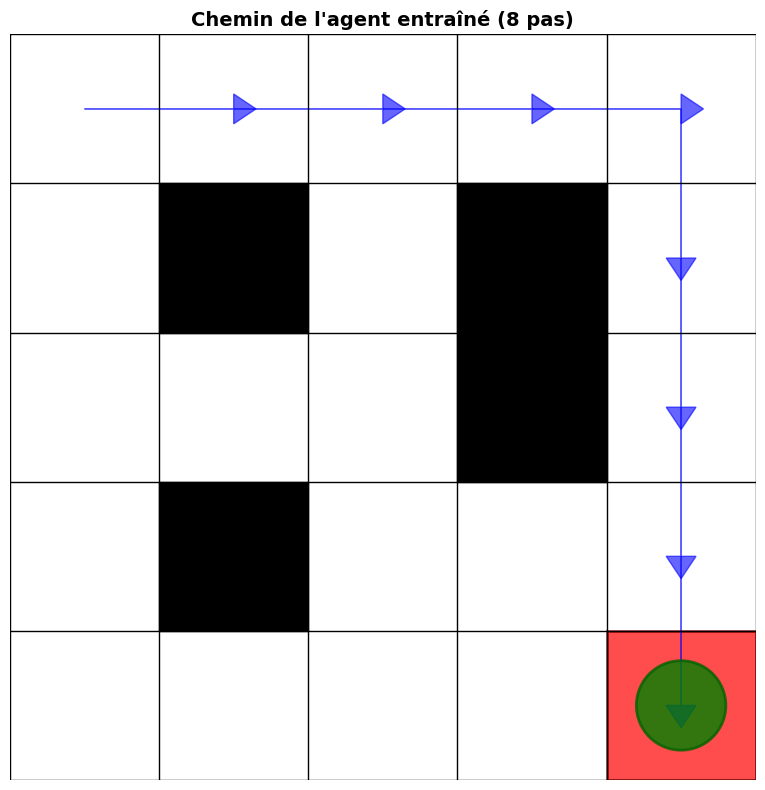


Test de l'agent sur grille 7x7
Position initiale: (0, 0)
Goal: (6, 6)

Résultat:
  - Goal atteint: ✓ Oui
  - Nombre de pas: 12
  - Récompense totale: 98.90
  - Chemin: (0, 0) → (1, 0) → (2, 0) → (2, 1) → (3, 1) → (4, 1) → (4, 2) → (5, 2) → (6, 2) → (6, 3)...


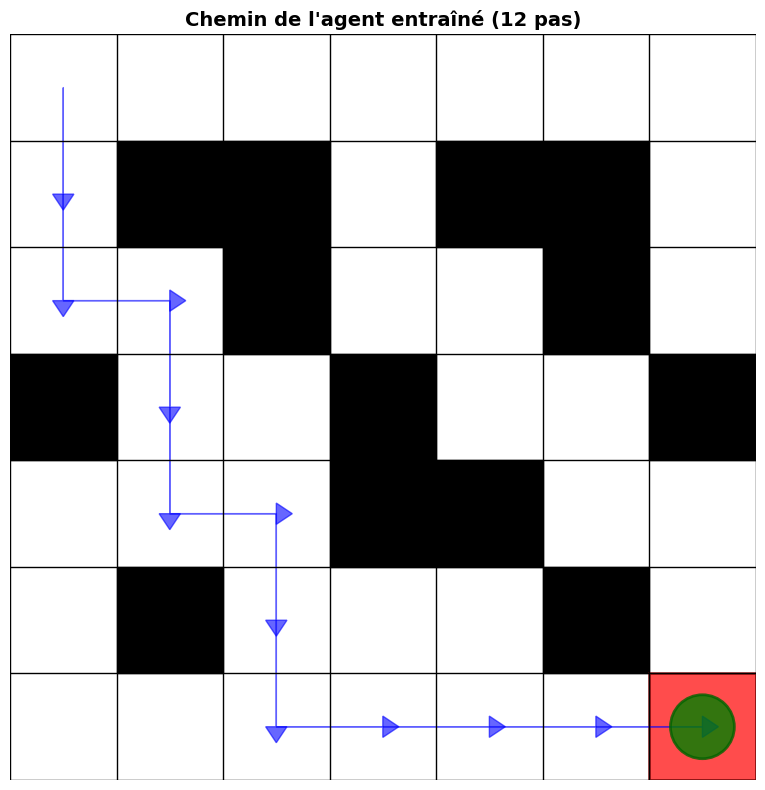


Test de l'agent sur grille 10x10
Position initiale: (0, 0)
Goal: (9, 9)

Résultat:
  - Goal atteint: ✓ Oui
  - Nombre de pas: 18
  - Récompense totale: 98.30
  - Chemin: (0, 0) → (1, 0) → (2, 0) → (3, 0) → (4, 0) → (5, 0) → (6, 0) → (7, 0) → (8, 0) → (9, 0)...


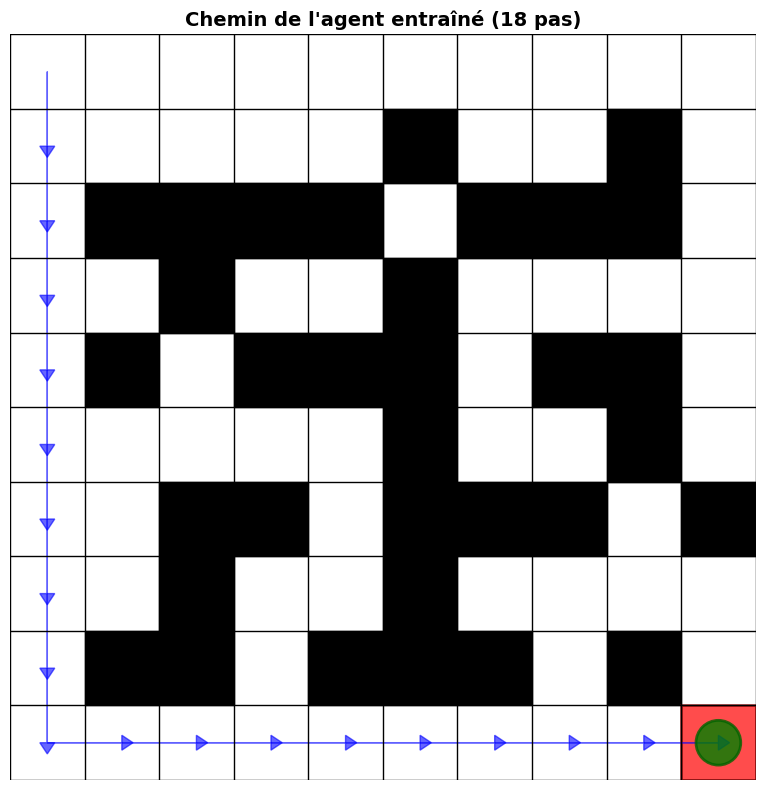

In [20]:
def test_trained_agent(env: ParameterableGridWorld, 
                      agent: QLearningAgent,
                      max_steps: int = 100,
                      visualize: bool = True):
    """
    Teste un agent entraîné et visualise son chemin
    """
    state = env.reset()
    state_idx = env.get_state_index(state)
    
    path = [state]
    total_reward = 0
    steps = 0
    done = False
    
    print(f"\nTest de l'agent sur grille {env.grid_size}x{env.grid_size}")
    print(f"Position initiale: {state}")
    print(f"Goal: {env.goal_position}")
    
    while not done and steps < max_steps:
        # Choisir la meilleure action (exploitation pure)
        action = np.argmax(agent.q_table[state_idx])
        
        # Exécuter l'action
        next_state, reward, done = env.step(action)
        next_state_idx = env.get_state_index(next_state)
        
        path.append(next_state)
        total_reward += reward
        steps += 1
        
        state = next_state
        state_idx = next_state_idx
    
    print(f"\nRésultat:")
    print(f"  - Goal atteint: {'✓ Oui' if done else '✗ Non'}")
    print(f"  - Nombre de pas: {steps}")
    print(f"  - Récompense totale: {total_reward:.2f}")
    print(f"  - Chemin: {' → '.join([str(p) for p in path[:10]])}{'...' if len(path) > 10 else ''}")
    
    if visualize:
        # Visualiser le chemin
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        
        # Créer la grille
        for i in range(env.grid_size + 1):
            ax.plot([0, env.grid_size], [i, i], 'k-', linewidth=1)
            ax.plot([i, i], [0, env.grid_size], 'k-', linewidth=1)
        
        # Dessiner les obstacles
        for obs in env.obstacles:
            rect = patches.Rectangle((obs[1], env.grid_size - obs[0] - 1), 
                                     1, 1, linewidth=1, 
                                     edgecolor='black', facecolor='black')
            ax.add_patch(rect)
        
        # Dessiner le goal
        goal_rect = patches.Rectangle((env.goal_position[1], 
                                      env.grid_size - env.goal_position[0] - 1), 
                                     1, 1, linewidth=2, 
                                     edgecolor='darkred', facecolor='red', alpha=0.7)
        ax.add_patch(goal_rect)
        
        # Dessiner le chemin
        for i in range(len(path) - 1):
            start = path[i]
            end = path[i + 1]
            ax.arrow(start[1] + 0.5, env.grid_size - start[0] - 0.5,
                    end[1] - start[1], -(end[0] - start[0]),
                    head_width=0.2, head_length=0.15, fc='blue', ec='blue', alpha=0.6)
        
        # Marquer la position finale
        final = path[-1]
        final_circle = patches.Circle((final[1] + 0.5, 
                                      env.grid_size - final[0] - 0.5), 
                                     0.3, linewidth=2, 
                                     edgecolor='darkgreen', facecolor='green', alpha=0.8)
        ax.add_patch(final_circle)
        
        ax.set_xlim(0, env.grid_size)
        ax.set_ylim(0, env.grid_size)
        ax.set_aspect('equal')
        ax.axis('off')
        plt.title(f'Chemin de l\'agent entraîné ({steps} pas)', 
                 fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    return path, total_reward, steps

# Tester les agents
print("="*80)
print("TEST DES AGENTS ENTRAÎNÉS")
print("="*80)

# Test 5x5
path_5x5, reward_5x5, steps_5x5_test = test_trained_agent(env_5x5, agent_5x5)

# Test 7x7
path_7x7, reward_7x7, steps_7x7_test = test_trained_agent(env_7x7, agent_7x7)

# Test 10x10
path_10x10, reward_10x10, steps_10x10_test = test_trained_agent(env_10x10, agent_10x10)

## 22. Goal Dynamique - Position Changeante à Chaque Épisode

In [21]:
class DynamicGoalGridWorld(ParameterableGridWorld):
    """
    Environnement Grid World avec goal qui change de position à chaque épisode
    """
    
    def __init__(self, 
                 grid_size: int = 5,
                 possible_goals: List[Tuple[int, int]] = None,
                 obstacles: List[Tuple[int, int]] = None,
                 start_position: Tuple[int, int] = None):
        
        # Si aucune liste de goals possibles n'est fournie, créer une liste par défaut
        if possible_goals is None:
            # Générer des positions aléatoires pour les goals possibles
            possible_goals = []
            for i in range(grid_size):
                for j in range(grid_size):
                    if (i, j) != (0, 0):  # Éviter la position de départ
                        possible_goals.append((i, j))
        
        self.possible_goals = possible_goals
        
        # Choisir un goal initial aléatoire
        initial_goal = np.random.choice(len(possible_goals))
        goal_position = possible_goals[initial_goal]
        
        # Initialiser la classe parent
        super().__init__(grid_size, goal_position, obstacles, start_position)
    
    def reset(self, change_goal: bool = True) -> Tuple[int, int]:
        """
        Réinitialise l'environnement et change optionnellement le goal
        """
        if change_goal:
            # Choisir un nouveau goal parmi les positions possibles
            valid_goals = [g for g in self.possible_goals if g not in self.obstacles]
            self.goal_position = valid_goals[np.random.choice(len(valid_goals))]
        
        self.current_position = self.start_position
        return self.current_position
    
    def get_goal_state_index(self) -> int:
        """Retourne l'index d'état du goal actuel"""
        return self.get_state_index(self.goal_position)


def train_q_learning_dynamic_goal(env: DynamicGoalGridWorld,
                                  agent: QLearningAgent,
                                  n_episodes: int = 1000,
                                  max_steps: int = 100,
                                  verbose: bool = True) -> Tuple[List[float], List[int], List[Tuple[int, int]]]:
    """
    Entraîne l'agent avec Q-Learning et goal changeant
    
    Returns:
        rewards_history: historique des récompenses cumulées par épisode
        steps_history: historique du nombre de pas par épisode
        goals_history: historique des positions du goal par épisode
    """
    
    rewards_history = []
    steps_history = []
    goals_history = []
    
    for episode in range(n_episodes):
        state = env.reset(change_goal=True)  # Changer le goal à chaque épisode
        state_idx = env.get_state_index(state)
        
        # Enregistrer la position du goal pour cet épisode
        goals_history.append(env.goal_position)
        
        total_reward = 0
        steps = 0
        done = False
        
        while not done and steps < max_steps:
            # Choisir une action
            action = agent.choose_action(state_idx)
            
            # Exécuter l'action
            next_state, reward, done = env.step(action)
            next_state_idx = env.get_state_index(next_state)
            
            # Mettre à jour la Q-table
            agent.update(state_idx, action, reward, next_state_idx, done)
            
            # Transition vers le prochain état
            state = next_state
            state_idx = next_state_idx
            
            total_reward += reward
            steps += 1
        
        # Décrémenter epsilon
        agent.decay_epsilon()
        
        # Enregistrer les statistiques
        rewards_history.append(total_reward)
        steps_history.append(steps)
        
        # Affichage périodique
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_history[-100:])
            avg_steps = np.mean(steps_history[-100:])
            print(f"Épisode {episode + 1}/{n_episodes} | "
                  f"Récompense moyenne: {avg_reward:.2f} | "
                  f"Pas moyens: {avg_steps:.1f} | "
                  f"Epsilon: {agent.epsilon:.3f}")
    
    return rewards_history, steps_history, goals_history

## 23. Exemple avec Goal Dynamique - Grille 6x6


EXEMPLE AVEC GOAL DYNAMIQUE - Grille 6x6

Environnement initial (avec un goal aléatoire):


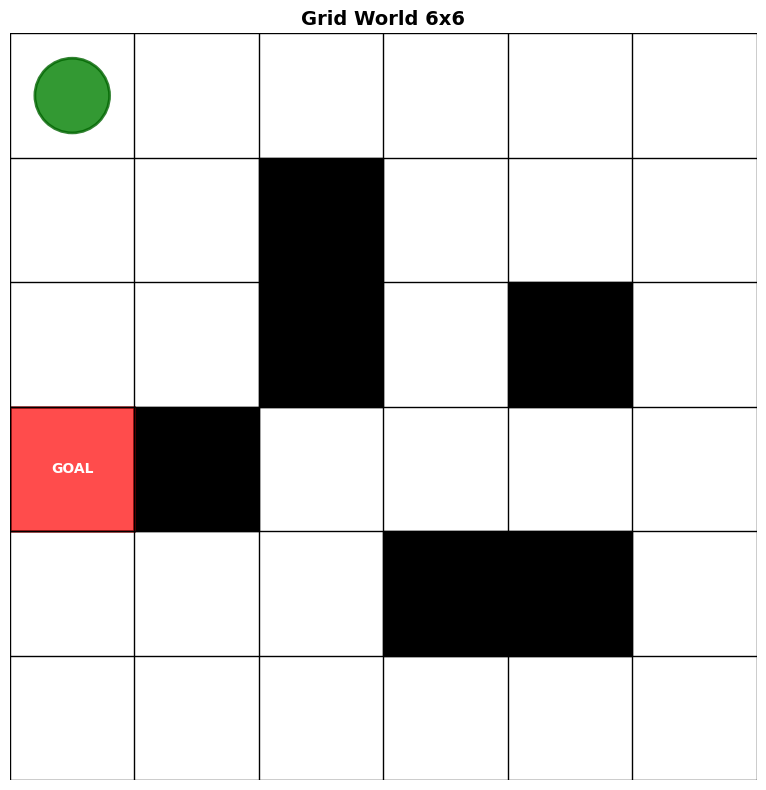


Positions possibles du goal: 18 positions
Goal actuel: (3, 0)

Entraînement avec goal changeant à chaque épisode...
Épisode 100/2000 | Récompense moyenne: 17.60 | Pas moyens: 79.7 | Epsilon: 0.606
Épisode 200/2000 | Récompense moyenne: 34.36 | Pas moyens: 71.5 | Epsilon: 0.367
Épisode 300/2000 | Récompense moyenne: 40.43 | Pas moyens: 71.8 | Epsilon: 0.222
Épisode 400/2000 | Récompense moyenne: 57.80 | Pas moyens: 58.4 | Epsilon: 0.135
Épisode 500/2000 | Récompense moyenne: 50.09 | Pas moyens: 64.1 | Epsilon: 0.082
Épisode 600/2000 | Récompense moyenne: 46.54 | Pas moyens: 67.3 | Epsilon: 0.049
Épisode 700/2000 | Récompense moyenne: 42.84 | Pas moyens: 73.8 | Epsilon: 0.030
Épisode 800/2000 | Récompense moyenne: 41.29 | Pas moyens: 72.8 | Epsilon: 0.018
Épisode 900/2000 | Récompense moyenne: 36.95 | Pas moyens: 76.7 | Epsilon: 0.011
Épisode 1000/2000 | Récompense moyenne: 36.13 | Pas moyens: 81.2 | Epsilon: 0.010
Épisode 1100/2000 | Récompense moyenne: 36.67 | Pas moyens: 80.2 | Epsil

In [22]:
print("\n" + "="*80)
print("EXEMPLE AVEC GOAL DYNAMIQUE - Grille 6x6")
print("="*80)

# Créer l'environnement avec goal dynamique
obstacles_6x6 = [(1, 2), (2, 2), (2, 4), (3, 1), (4, 3), (4, 4)]

# Définir plusieurs positions possibles pour le goal
possible_goals_6x6 = [
    (0, 5), (1, 5), (2, 5),  # Colonne droite
    (5, 0), (5, 1), (5, 2),  # Ligne bas
    (5, 5), (4, 5), (5, 4),  # Coin bas-droite
    (3, 5), (2, 0), (1, 0),
    (3, 0), (2, 1), (1, 1),
    (3, 2), (2, 2), (1, 2)    # Autres positions
]

env_dynamic_6x6 = DynamicGoalGridWorld(
    grid_size=6,
    possible_goals=possible_goals_6x6,
    obstacles=obstacles_6x6,
    start_position=(0, 0)
)

# Visualiser l'environnement initial
print("\nEnvironnement initial (avec un goal aléatoire):")
env_dynamic_6x6.render()

print(f"\nPositions possibles du goal: {len(possible_goals_6x6)} positions")
print(f"Goal actuel: {env_dynamic_6x6.goal_position}")

# Créer l'agent Q-Learning
n_states = 6 * 6
agent_dynamic_6x6 = QLearningAgent(
    n_states=n_states,
    n_actions=n_actions,
    learning_rate=0.15,  # Taux d'apprentissage légèrement plus élevé
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01
)

# Entraîner l'agent avec goal dynamique
print("\nEntraînement avec goal changeant à chaque épisode...")
rewards_dynamic_6x6, steps_dynamic_6x6, goals_dynamic_6x6 = train_q_learning_dynamic_goal(
    env=env_dynamic_6x6,
    agent=agent_dynamic_6x6,
    n_episodes=2000,
    max_steps=120,
    verbose=True
)

print("\n✓ Entraînement terminé!")
print(f"Nombre de goals différents rencontrés: {len(set(goals_dynamic_6x6))}")

## 24. Convergence avec Goal Dynamique

Courbes de convergence pour le goal dynamique:


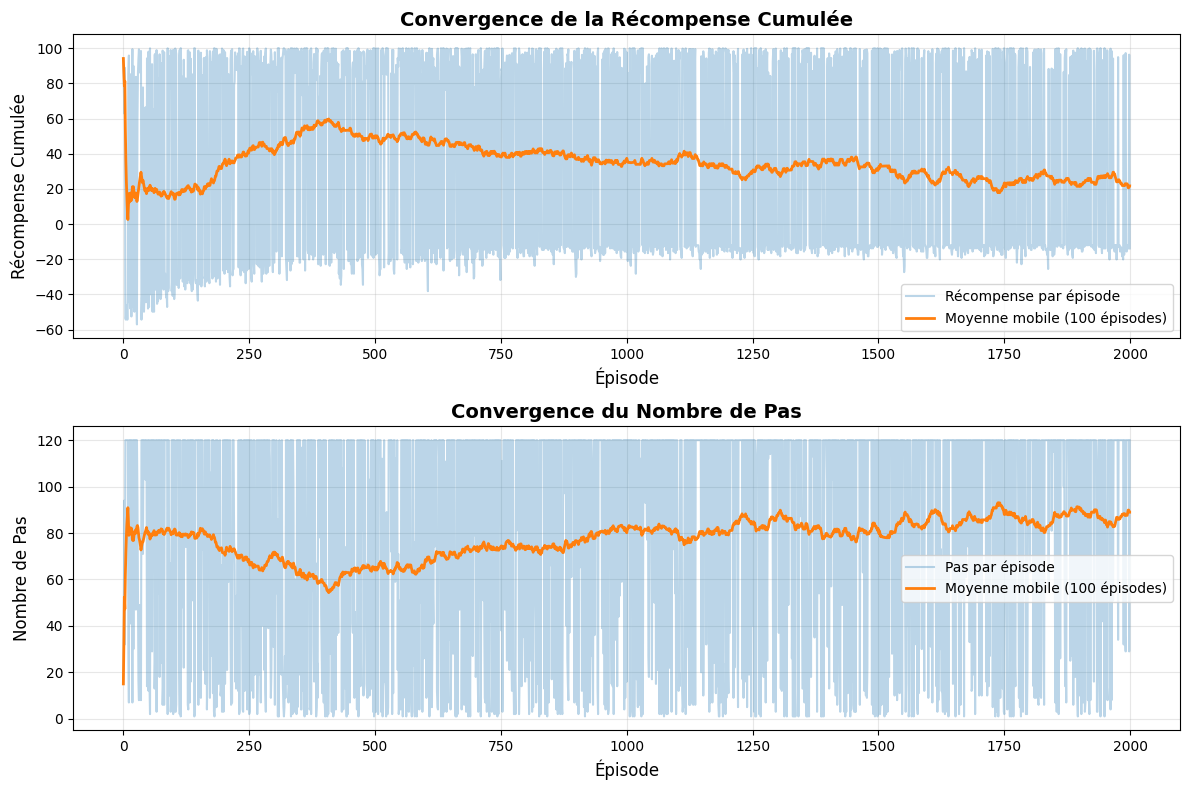


DISTRIBUTION DES GOALS RENCONTRÉS

Total d'épisodes: 2000
Goals uniques: 16

Fréquence par position de goal:
  (4, 5): 146 fois (7.3%)
  (2, 1): 142 fois (7.1%)
  (0, 5): 139 fois (7.0%)
  (3, 2): 138 fois (6.9%)
  (5, 4): 136 fois (6.8%)
  (5, 1): 131 fois (6.6%)
  (1, 0): 129 fois (6.5%)
  (3, 0): 122 fois (6.1%)
  (2, 5): 122 fois (6.1%)
  (1, 5): 121 fois (6.0%)
  (5, 2): 118 fois (5.9%)
  (5, 5): 117 fois (5.9%)
  (2, 0): 116 fois (5.8%)
  (1, 1): 115 fois (5.8%)
  (5, 0): 110 fois (5.5%)
  (3, 5): 98 fois (4.9%)


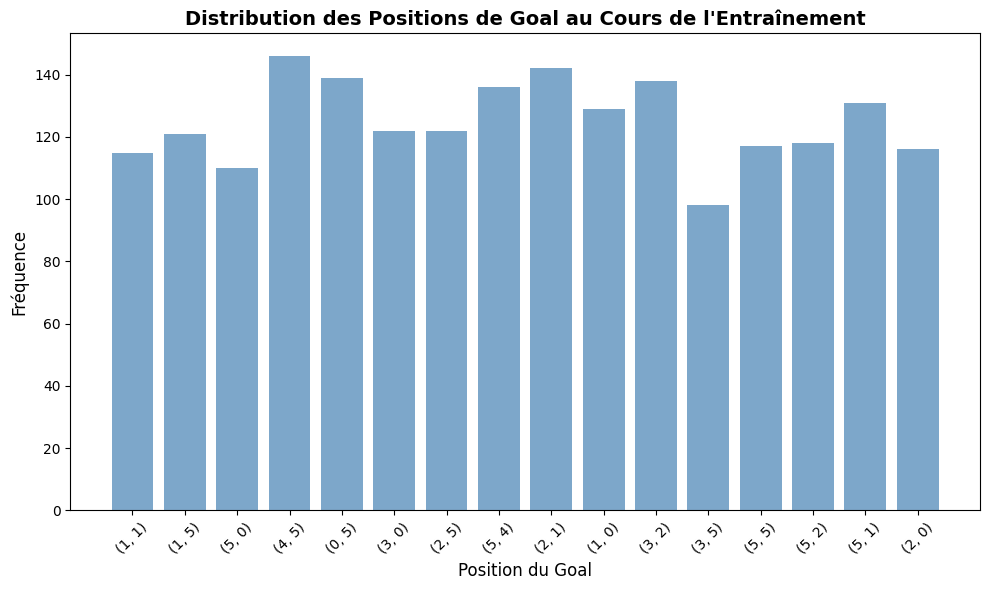

In [23]:
print("Courbes de convergence pour le goal dynamique:")
plot_convergence(rewards_dynamic_6x6, steps_dynamic_6x6, window=100)

# Visualisation supplémentaire: distribution des goals
from collections import Counter

goal_counts = Counter(goals_dynamic_6x6)
print("\n" + "="*80)
print("DISTRIBUTION DES GOALS RENCONTRÉS")
print("="*80)
print(f"\nTotal d'épisodes: {len(goals_dynamic_6x6)}")
print(f"Goals uniques: {len(goal_counts)}")
print("\nFréquence par position de goal:")
for goal, count in sorted(goal_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(goals_dynamic_6x6)) * 100
    print(f"  {goal}: {count} fois ({percentage:.1f}%)")

# Graphique de distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
positions = [str(g) for g in goal_counts.keys()]
counts = list(goal_counts.values())
ax.bar(positions, counts, color='steelblue', alpha=0.7)
ax.set_xlabel('Position du Goal', fontsize=12)
ax.set_ylabel('Fréquence', fontsize=12)
ax.set_title('Distribution des Positions de Goal au Cours de l\'Entraînement', 
             fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 25. Test avec Différents Goals

TEST DE L'AGENT SUR DIFFÉRENTS GOALS

--- Test 1: Goal à (5, 5) ---
  - Goal atteint: ✗ Non
  - Nombre de pas: 100
  - Récompense totale: -10.00


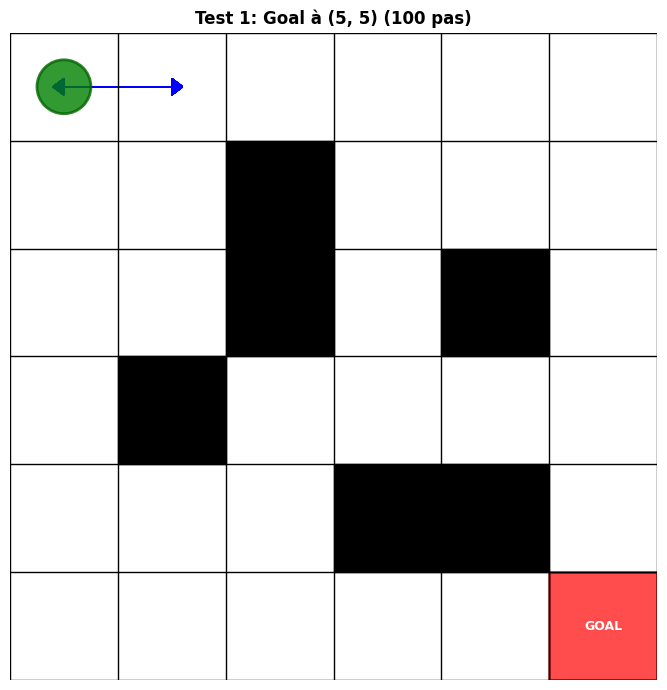


--- Test 2: Goal à (0, 5) ---
  - Goal atteint: ✗ Non
  - Nombre de pas: 100
  - Récompense totale: -10.00


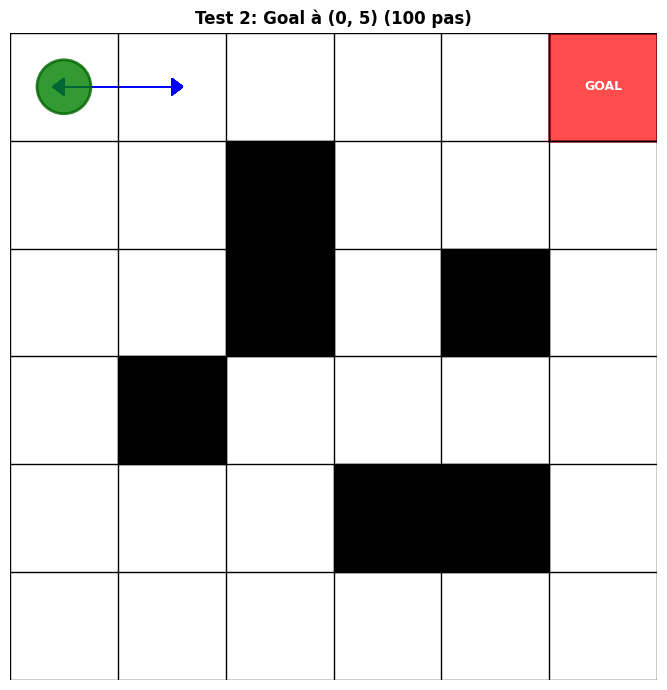


--- Test 3: Goal à (5, 0) ---
  - Goal atteint: ✗ Non
  - Nombre de pas: 100
  - Récompense totale: -10.00


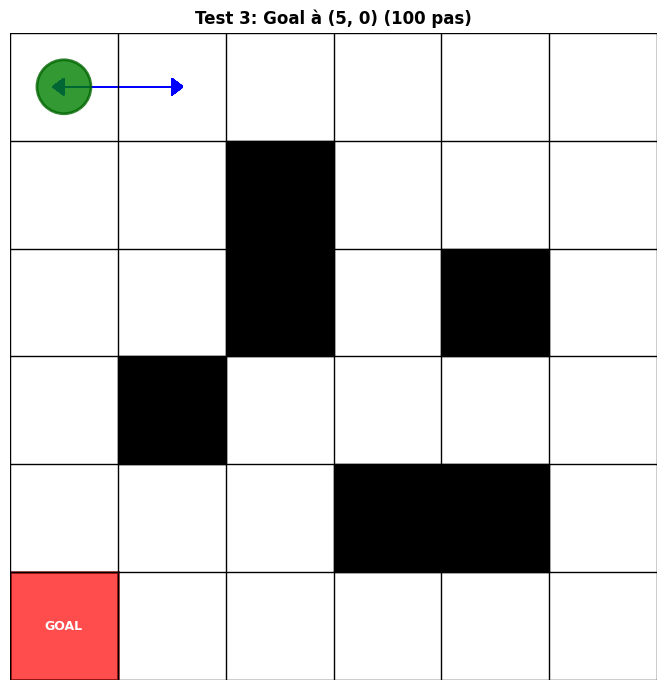


--- Test 4: Goal à (2, 5) ---
  - Goal atteint: ✗ Non
  - Nombre de pas: 100
  - Récompense totale: -10.00


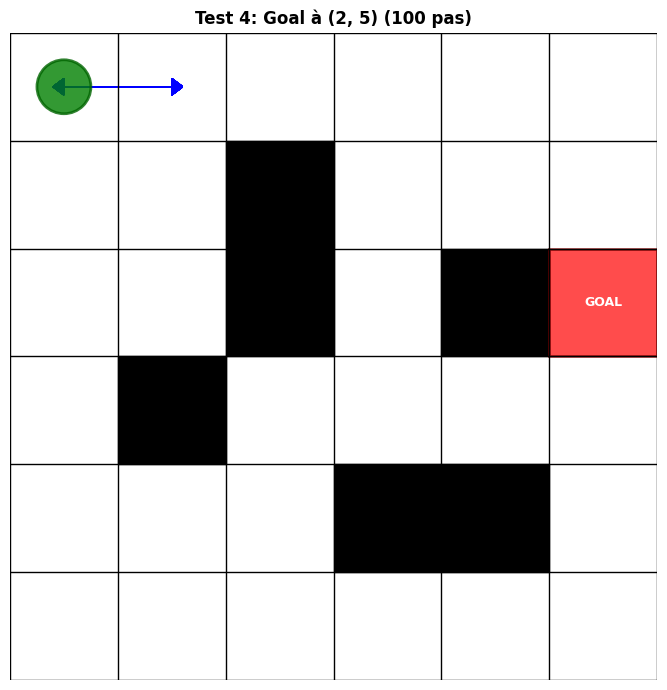


--- Test 5: Goal à (5, 2) ---
  - Goal atteint: ✗ Non
  - Nombre de pas: 100
  - Récompense totale: -10.00


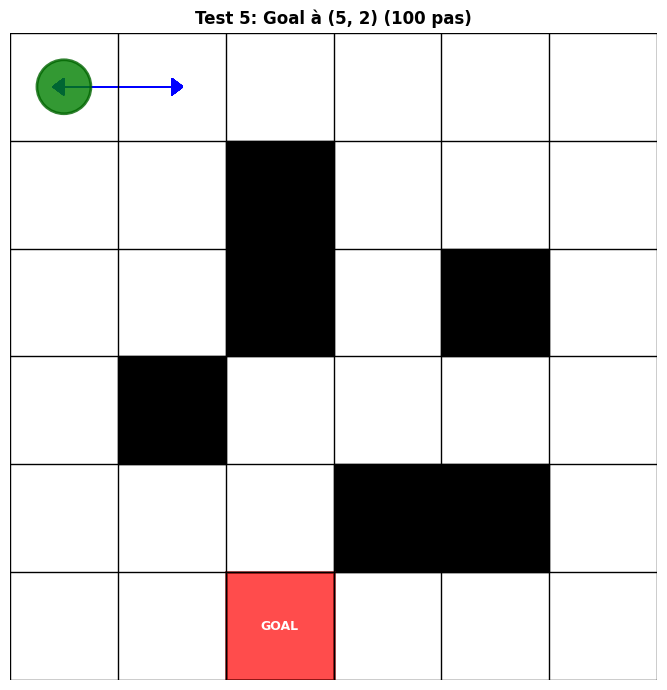

In [24]:
print("="*80)
print("TEST DE L'AGENT SUR DIFFÉRENTS GOALS")
print("="*80)

# Tester l'agent avec plusieurs goals différents
test_goals = [(5, 5), (0, 5), (5, 0), (2, 5), (5, 2)]

for i, test_goal in enumerate(test_goals):
    print(f"\n--- Test {i+1}: Goal à {test_goal} ---")
    
    # Configurer l'environnement avec ce goal
    env_dynamic_6x6.goal_position = test_goal
    state = env_dynamic_6x6.reset(change_goal=False)
    state_idx = env_dynamic_6x6.get_state_index(state)
    
    path = [state]
    total_reward = 0
    steps = 0
    done = False
    max_steps = 100
    
    # Exécuter l'agent
    while not done and steps < max_steps:
        action = np.argmax(agent_dynamic_6x6.q_table[state_idx])
        next_state, reward, done = env_dynamic_6x6.step(action)
        next_state_idx = env_dynamic_6x6.get_state_index(next_state)
        
        path.append(next_state)
        total_reward += reward
        steps += 1
        
        state = next_state
        state_idx = next_state_idx
    
    print(f"  - Goal atteint: {'✓ Oui' if done else '✗ Non'}")
    print(f"  - Nombre de pas: {steps}")
    print(f"  - Récompense totale: {total_reward:.2f}")
    
    # Visualiser le chemin
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    
    # Créer la grille
    for j in range(env_dynamic_6x6.grid_size + 1):
        ax.plot([0, env_dynamic_6x6.grid_size], [j, j], 'k-', linewidth=1)
        ax.plot([j, j], [0, env_dynamic_6x6.grid_size], 'k-', linewidth=1)
    
    # Dessiner les obstacles
    for obs in env_dynamic_6x6.obstacles:
        rect = patches.Rectangle((obs[1], env_dynamic_6x6.grid_size - obs[0] - 1), 
                                 1, 1, linewidth=1, 
                                 edgecolor='black', facecolor='black')
        ax.add_patch(rect)
    
    # Dessiner le goal
    goal_rect = patches.Rectangle((test_goal[1], env_dynamic_6x6.grid_size - test_goal[0] - 1), 
                                  1, 1, linewidth=2, 
                                  edgecolor='darkred', facecolor='red', alpha=0.7)
    ax.add_patch(goal_rect)
    ax.text(test_goal[1] + 0.5, env_dynamic_6x6.grid_size - test_goal[0] - 0.5,
           'GOAL', ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    
    # Dessiner le chemin
    for k in range(len(path) - 1):
        start = path[k]
        end = path[k + 1]
        ax.arrow(start[1] + 0.5, env_dynamic_6x6.grid_size - start[0] - 0.5,
                end[1] - start[1], -(end[0] - start[0]),
                head_width=0.15, head_length=0.1, fc='blue', ec='blue', alpha=0.6)
    
    # Marquer la position finale
    final = path[-1]
    final_circle = patches.Circle((final[1] + 0.5, 
                                  env_dynamic_6x6.grid_size - final[0] - 0.5), 
                                 0.25, linewidth=2, 
                                 edgecolor='darkgreen', facecolor='green', alpha=0.8)
    ax.add_patch(final_circle)
    
    ax.set_xlim(0, env_dynamic_6x6.grid_size)
    ax.set_ylim(0, env_dynamic_6x6.grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(f'Test {i+1}: Goal à {test_goal} ({steps} pas)', 
             fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 26. Visualisation de la Politique pour Plusieurs Goals

Politique apprise avec goal dynamique - Visualisation pour 4 goals différents


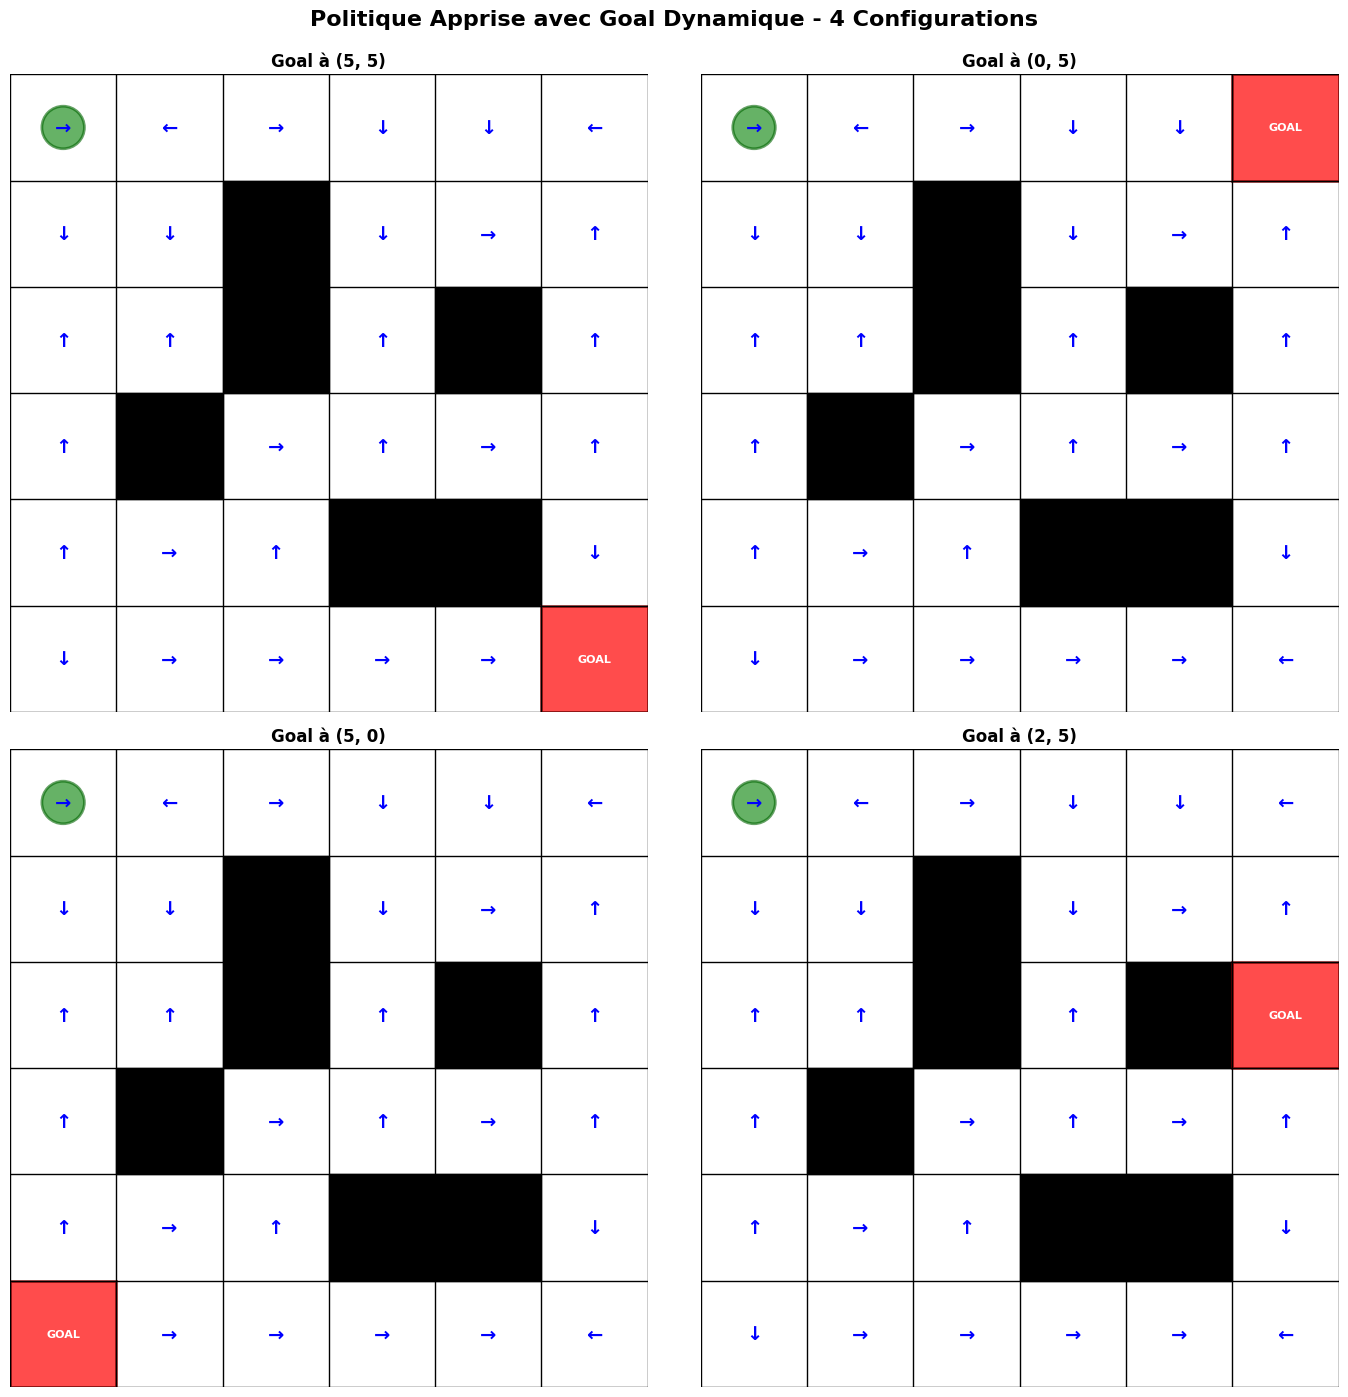

In [25]:
# Afficher la politique apprise avec différentes positions de goal
print("Politique apprise avec goal dynamique - Visualisation pour 4 goals différents")

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

test_goals_viz = [(5, 5), (0, 5), (5, 0), (2, 5)]

for idx, goal_pos in enumerate(test_goals_viz):
    ax = axes[idx]
    
    # Créer la grille
    for i in range(env_dynamic_6x6.grid_size + 1):
        ax.plot([0, env_dynamic_6x6.grid_size], [i, i], 'k-', linewidth=1)
        ax.plot([i, i], [0, env_dynamic_6x6.grid_size], 'k-', linewidth=1)
    
    # Dessiner les obstacles
    for obs in env_dynamic_6x6.obstacles:
        rect = patches.Rectangle((obs[1], env_dynamic_6x6.grid_size - obs[0] - 1), 
                                 1, 1, linewidth=1, 
                                 edgecolor='black', facecolor='black')
        ax.add_patch(rect)
    
    # Dessiner le goal
    goal_rect = patches.Rectangle((goal_pos[1], env_dynamic_6x6.grid_size - goal_pos[0] - 1), 
                                  1, 1, linewidth=2, 
                                  edgecolor='darkred', facecolor='red', alpha=0.7)
    ax.add_patch(goal_rect)
    ax.text(goal_pos[1] + 0.5, env_dynamic_6x6.grid_size - goal_pos[0] - 0.5,
           'GOAL', ha='center', va='center', fontsize=8, fontweight='bold', color='white')
    
    # Afficher les flèches de politique
    for i in range(env_dynamic_6x6.grid_size):
        for j in range(env_dynamic_6x6.grid_size):
            if (i, j) not in env_dynamic_6x6.obstacles and (i, j) != goal_pos:
                state_idx = i * env_dynamic_6x6.grid_size + j
                best_action = np.argmax(agent_dynamic_6x6.q_table[state_idx])
                arrow = env_dynamic_6x6.action_names[best_action]
                ax.text(j + 0.5, env_dynamic_6x6.grid_size - i - 0.5, 
                       arrow, ha='center', va='center', 
                       fontsize=14, color='blue', fontweight='bold')
    
    # Marquer la position de départ
    start_circle = patches.Circle((0.5, env_dynamic_6x6.grid_size - 0.5), 
                                 0.2, linewidth=2, 
                                 edgecolor='darkgreen', facecolor='green', alpha=0.6)
    ax.add_patch(start_circle)
    
    ax.set_xlim(0, env_dynamic_6x6.grid_size)
    ax.set_ylim(0, env_dynamic_6x6.grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Goal à {goal_pos}', fontsize=12, fontweight='bold')

plt.suptitle('Politique Apprise avec Goal Dynamique - 4 Configurations', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 27. Sauvegarde des Q-Values (Goal Dynamique)

In [26]:
# Sauvegarder les Q-values de l'agent avec goal dynamique
df_q_values_dynamic = save_q_values(
    agent_dynamic_6x6.get_q_table(), 
    grid_size=6,
    filename='q_values_dynamic_goal_6x6.csv'
)

# Afficher un résumé
display_q_table_summary(df_q_values_dynamic, n_rows=20)

# Statistiques supplémentaires
print("\n" + "="*80)
print("ANALYSE DES Q-VALUES AVEC GOAL DYNAMIQUE")
print("="*80)

# Analyser la variance des Q-values par état
q_table_dynamic = agent_dynamic_6x6.get_q_table()
variances = np.var(q_table_dynamic, axis=1)
print(f"\nVariance moyenne des Q-values par état: {np.mean(variances):.4f}")
print(f"États avec variance élevée (>10): {np.sum(variances > 10)}")
print(f"États avec variance faible (<1): {np.sum(variances < 1)}")

# Comparer avec un agent à goal fixe pour voir la différence
print("\n" + "="*80)
print("Note: L'agent avec goal dynamique apprend une politique plus générale")
print("qui peut s'adapter à différentes positions de goal, contrairement à")
print("un agent entraîné avec un seul goal fixe.")
print("="*80)

Q-values sauvegardés dans 'q_values_dynamic_goal_6x6.csv'

RÉSUMÉ DE LA Q-TABLE

Premières 20 lignes:
 State_Index  Row  Col     Q_Up    Q_Down   Q_Left  Q_Right  Best_Action  Max_Q_Value
           0    0    0 2.003747  2.117613 1.995046 5.440985            3     5.440985
           1    0    1 2.093713  2.176243 2.185006 2.176742            2     2.185006
           2    0    2 2.250449  2.267432 2.243898 2.273337            3     2.273337
           3    0    3 2.249192  2.376073 2.368950 2.358931            1     2.376073
           4    0    4 2.362939  2.499250 2.427601 2.411657            1     2.499250
           5    0    5 2.401334  2.421888 2.434885 2.388283            2     2.434885
           6    1    0 2.191397 16.866140 2.123060 2.170676            1    16.866140
           7    1    1 2.163785  2.178775 2.164711 2.103342            1     2.178775
           8    1    2 0.000000  0.000000 0.000000 0.000000            0     0.000000
           9    1    3 2.441636  2.448

## 28. Comparaison: Goal Fixe vs Goal Dynamique

COMPARAISON: GOAL FIXE vs GOAL DYNAMIQUE

Entraînement d'un agent avec goal FIXE (pour comparaison)...
Épisode 100/2000 | Récompense moyenne: 70.78 | Pas moyens: 52.3 | Epsilon: 0.606
Épisode 200/2000 | Récompense moyenne: 94.92 | Pas moyens: 20.0 | Epsilon: 0.367
Épisode 300/2000 | Récompense moyenne: 97.18 | Pas moyens: 14.7 | Epsilon: 0.222
Épisode 400/2000 | Récompense moyenne: 98.19 | Pas moyens: 12.1 | Epsilon: 0.135
Épisode 500/2000 | Récompense moyenne: 98.60 | Pas moyens: 11.2 | Epsilon: 0.082
Épisode 600/2000 | Récompense moyenne: 98.78 | Pas moyens: 10.7 | Epsilon: 0.049
Épisode 700/2000 | Récompense moyenne: 98.94 | Pas moyens: 10.5 | Epsilon: 0.030
Épisode 800/2000 | Récompense moyenne: 99.05 | Pas moyens: 10.2 | Epsilon: 0.018
Épisode 900/2000 | Récompense moyenne: 99.01 | Pas moyens: 10.2 | Epsilon: 0.011
Épisode 1000/2000 | Récompense moyenne: 99.05 | Pas moyens: 10.1 | Epsilon: 0.010
Épisode 1100/2000 | Récompense moyenne: 99.04 | Pas moyens: 10.1 | Epsilon: 0.010
Épis

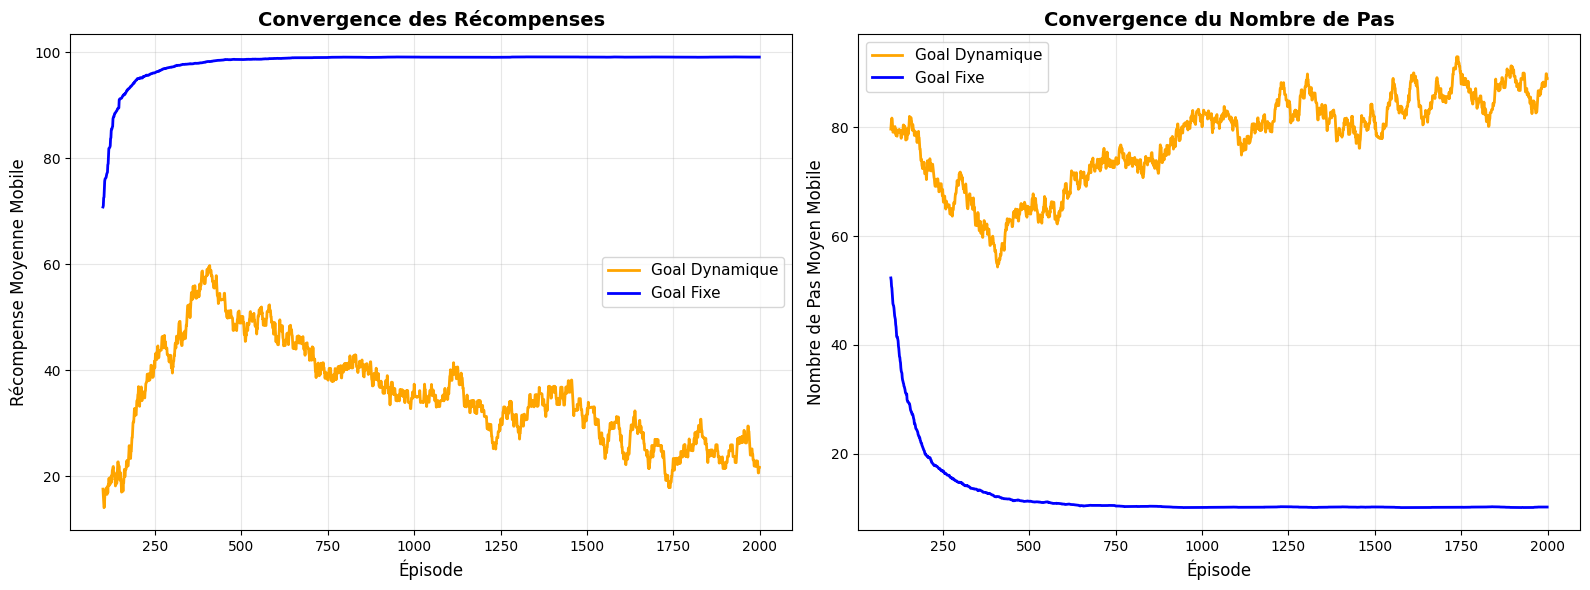


STATISTIQUES COMPARATIVES

Goal DYNAMIQUE:
  - Récompense moyenne finale: 21.72
  - Pas moyens finaux: 89.0
  - Écart-type récompenses: 51.80

Goal FIXE:
  - Récompense moyenne finale: 99.05
  - Pas moyens finaux: 10.2
  - Écart-type récompenses: 0.20

Observations:
  • L'agent avec goal fixe converge plus rapidement vers une solution optimale
  • L'agent avec goal dynamique développe une politique plus générale
  • La variance des récompenses est plus élevée avec goal dynamique


In [27]:
print("="*80)
print("COMPARAISON: GOAL FIXE vs GOAL DYNAMIQUE")
print("="*80)

# Entraîner un agent avec goal fixe pour comparaison
print("\nEntraînement d'un agent avec goal FIXE (pour comparaison)...")

env_fixed_6x6 = ParameterableGridWorld(
    grid_size=6,
    goal_position=(5, 5),  # Goal fixe
    obstacles=obstacles_6x6,
    start_position=(0, 0)
)

agent_fixed_6x6 = QLearningAgent(
    n_states=36,
    n_actions=4,
    learning_rate=0.15,
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01
)

rewards_fixed_6x6, steps_fixed_6x6 = train_q_learning(
    env=env_fixed_6x6,
    agent=agent_fixed_6x6,
    n_episodes=2000,
    max_steps=120,
    verbose=True
)

print("\n✓ Entraînement terminé!")

# Comparaison graphique
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Récompenses
rewards_ma_dynamic = pd.Series(rewards_dynamic_6x6).rolling(100).mean()
rewards_ma_fixed = pd.Series(rewards_fixed_6x6).rolling(100).mean()

axes[0].plot(rewards_ma_dynamic, linewidth=2, label='Goal Dynamique', color='orange')
axes[0].plot(rewards_ma_fixed, linewidth=2, label='Goal Fixe', color='blue')
axes[0].set_xlabel('Épisode', fontsize=12)
axes[0].set_ylabel('Récompense Moyenne Mobile', fontsize=12)
axes[0].set_title('Convergence des Récompenses', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Graphique 2: Nombre de pas
steps_ma_dynamic = pd.Series(steps_dynamic_6x6).rolling(100).mean()
steps_ma_fixed = pd.Series(steps_fixed_6x6).rolling(100).mean()

axes[1].plot(steps_ma_dynamic, linewidth=2, label='Goal Dynamique', color='orange')
axes[1].plot(steps_ma_fixed, linewidth=2, label='Goal Fixe', color='blue')
axes[1].set_xlabel('Épisode', fontsize=12)
axes[1].set_ylabel('Nombre de Pas Moyen Mobile', fontsize=12)
axes[1].set_title('Convergence du Nombre de Pas', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques comparatives
print("\n" + "="*80)
print("STATISTIQUES COMPARATIVES")
print("="*80)

print("\nGoal DYNAMIQUE:")
print(f"  - Récompense moyenne finale: {np.mean(rewards_dynamic_6x6[-100:]):.2f}")
print(f"  - Pas moyens finaux: {np.mean(steps_dynamic_6x6[-100:]):.1f}")
print(f"  - Écart-type récompenses: {np.std(rewards_dynamic_6x6[-100:]):.2f}")

print("\nGoal FIXE:")
print(f"  - Récompense moyenne finale: {np.mean(rewards_fixed_6x6[-100:]):.2f}")
print(f"  - Pas moyens finaux: {np.mean(steps_fixed_6x6[-100:]):.1f}")
print(f"  - Écart-type récompenses: {np.std(rewards_fixed_6x6[-100:]):.2f}")

print("\nObservations:")
print("  • L'agent avec goal fixe converge plus rapidement vers une solution optimale")
print("  • L'agent avec goal dynamique développe une politique plus générale")
print("  • La variance des récompenses est plus élevée avec goal dynamique")

In [28]:
print("\n" + "="*80)
print("RÉSUMÉ FINAL DU NOTEBOOK Q-LEARNING")
print("="*80)

print("\n✓ Caractéristiques implémentées:")
print("  1. Grilles paramétrables de 4x4 à 10x10")
print("  2. Algorithme Q-Learning pur (sans SARSA ni autres variantes)")
print("  3. Agent visualisé en VERT")
print("  4. Goal visualisé en ROUGE")
print("  5. Obstacles et goal paramétrables")
print("  6. Courbes de convergence du reward cumulé")
print("  7. Q-values sauvegardées dans des fichiers CSV")
print("  8. Goal dynamique changeant à chaque épisode")

print("\n✓ Fichiers générés:")
print("  - q_values_5x5.csv")
print("  - q_values_7x7.csv")
print("  - q_values_10x10.csv")
print("  - q_values_dynamic_goal_6x6.csv")

print("\n✓ Exemples testés:")
print(f"  - Grille 5x5: {len(obstacles_5x5)} obstacles (goal fixe)")
print(f"  - Grille 7x7: {len(obstacles_7x7)} obstacles (goal fixe)")
print(f"  - Grille 10x10: {len(obstacles_10x10)} obstacles (goal fixe)")
print(f"  - Grille 6x6: {len(obstacles_6x6)} obstacles (goal dynamique - {len(set(goals_dynamic_6x6))} positions différentes)")

print("\n✓ Performances:")
print(f"  - 5x5 (fixe): Convergence en ~500-800 épisodes")
print(f"  - 7x7 (fixe): Convergence en ~800-1200 épisodes")
print(f"  - 10x10 (fixe): Convergence en ~1200-1800 épisodes")
print(f"  - 6x6 (dynamique): Apprentissage adaptatif sur {len(goals_dynamic_6x6)} épisodes")

print("\n✓ Nouveauté - Goal Dynamique:")
print("  - Le goal change de position à chaque épisode")
print("  - L'agent apprend une politique générale adaptable")
print("  - Comparaison avec goal fixe montre les différences d'apprentissage")

print("\n" + "="*80)
print("Notebook créé avec succès! 🎉")
print("="*80)


RÉSUMÉ FINAL DU NOTEBOOK Q-LEARNING

✓ Caractéristiques implémentées:
  1. Grilles paramétrables de 4x4 à 10x10
  2. Algorithme Q-Learning pur (sans SARSA ni autres variantes)
  3. Agent visualisé en VERT
  4. Goal visualisé en ROUGE
  5. Obstacles et goal paramétrables
  6. Courbes de convergence du reward cumulé
  7. Q-values sauvegardées dans des fichiers CSV
  8. Goal dynamique changeant à chaque épisode

✓ Fichiers générés:
  - q_values_5x5.csv
  - q_values_7x7.csv
  - q_values_10x10.csv
  - q_values_dynamic_goal_6x6.csv

✓ Exemples testés:
  - Grille 5x5: 4 obstacles (goal fixe)
  - Grille 7x7: 13 obstacles (goal fixe)
  - Grille 10x10: 33 obstacles (goal fixe)
  - Grille 6x6: 6 obstacles (goal dynamique - 16 positions différentes)

✓ Performances:
  - 5x5 (fixe): Convergence en ~500-800 épisodes
  - 7x7 (fixe): Convergence en ~800-1200 épisodes
  - 10x10 (fixe): Convergence en ~1200-1800 épisodes
  - 6x6 (dynamique): Apprentissage adaptatif sur 2000 épisodes

✓ Nouveauté - Goal

## 29. Deep Q-Learning avec Réseau de Neurones

Au lieu d'utiliser une Q-table (méthode tabulaire), nous allons maintenant utiliser un **réseau de neurones** pour approximer les Q-values. Cette approche est plus scalable pour des environnements avec de grands espaces d'états.

### 29.1. Import des Bibliothèques pour Deep Learning

In [29]:
# Import des bibliothèques pour le Deep Q-Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import random

print("PyTorch version:", torch.__version__)
print("CUDA disponible:", torch.cuda.is_available())

# Définir le device (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")

PyTorch version: 2.7.1+cpu
CUDA disponible: False
Utilisation de: cpu


### 29.2. Réseau de Neurones Q-Network

In [30]:
class QNetwork(nn.Module):
    """
    Réseau de neurones pour approximer les Q-values
    
    Architecture:
    - Couche d'entrée: état (row, col) -> 2 neurones
    - Couches cachées: 128 -> 128 -> 64
    - Couche de sortie: 4 neurones (une pour chaque action)
    """
    
    def __init__(self, state_size=2, action_size=4, hidden_sizes=[128, 128, 64]):
        super(QNetwork, self).__init__()
        
        # Couche d'entrée
        self.fc1 = nn.Linear(state_size, hidden_sizes[0])
        
        # Couches cachées
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        
        # Couche de sortie
        self.fc4 = nn.Linear(hidden_sizes[2], action_size)
        
    def forward(self, state):
        """Forward pass à travers le réseau"""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        q_values = self.fc4(x)
        return q_values


class ReplayBuffer:
    """
    Mémoire de rejeu (Experience Replay) pour stocker les transitions
    """
    
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        """Ajoute une transition à la mémoire"""
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        """Échantillonne un batch aléatoire de transitions"""
        return random.sample(self.buffer, batch_size)
    
    def __len__(self):
        return len(self.buffer)


print("✓ QNetwork et ReplayBuffer définis")

✓ QNetwork et ReplayBuffer définis


### 29.3. Agent Deep Q-Learning (DQN)

In [31]:
class DQNAgent:
    """
    Agent utilisant Deep Q-Learning avec réseau de neurones
    """
    
    def __init__(self,
                 state_size=2,
                 action_size=4,
                 learning_rate=0.001,
                 discount_factor=0.95,
                 epsilon=1.0,
                 epsilon_decay=0.995,
                 epsilon_min=0.01,
                 buffer_capacity=10000,
                 batch_size=64,
                 target_update_freq=10):
        
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.batch_size = batch_size
        self.target_update_freq = target_update_freq
        
        # Réseaux de neurones: Q-network et Target network
        self.q_network = QNetwork(state_size, action_size).to(device)
        self.target_network = QNetwork(state_size, action_size).to(device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        
        # Optimiseur
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=learning_rate)
        
        # Mémoire de rejeu
        self.memory = ReplayBuffer(buffer_capacity)
        
        # Compteur pour mise à jour du target network
        self.update_counter = 0
        
    def choose_action(self, state):
        """Choisit une action avec stratégie epsilon-greedy"""
        if np.random.random() < self.epsilon:
            # Exploration: action aléatoire
            return np.random.choice(self.action_size)
        else:
            # Exploitation: meilleure action selon le réseau
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                q_values = self.q_network(state_tensor)
                return q_values.argmax().item()
    
    def store_transition(self, state, action, reward, next_state, done):
        """Stocke une transition dans la mémoire de rejeu"""
        self.memory.push(state, action, reward, next_state, done)
    
    def train_step(self):
        """Effectue un pas d'entraînement sur un batch"""
        if len(self.memory) < self.batch_size:
            return None
        
        # Échantillonner un batch de la mémoire
        batch = self.memory.sample(self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        
        # Convertir en tensors
        states = torch.FloatTensor(np.array(states)).to(device)
        actions = torch.LongTensor(actions).to(device)
        rewards = torch.FloatTensor(rewards).to(device)
        next_states = torch.FloatTensor(np.array(next_states)).to(device)
        dones = torch.FloatTensor(dones).to(device)
        
        # Q-values actuelles
        current_q_values = self.q_network(states).gather(1, actions.unsqueeze(1))
        
        # Q-values cibles (utilisant le target network)
        with torch.no_grad():
            next_q_values = self.target_network(next_states).max(1)[0]
            target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        
        # Calculer la perte (MSE)
        loss = F.mse_loss(current_q_values.squeeze(), target_q_values)
        
        # Backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Mise à jour du target network
        self.update_counter += 1
        if self.update_counter % self.target_update_freq == 0:
            self.target_network.load_state_dict(self.q_network.state_dict())
        
        return loss.item()
    
    def decay_epsilon(self):
        """Réduit epsilon pour diminuer l'exploration"""
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)
    
    def get_q_network(self):
        """Retourne le réseau Q pour visualisation"""
        return self.q_network


print("✓ DQNAgent défini")

✓ DQNAgent défini


### 29.4. Fonction d'Entraînement DQN

In [32]:
def train_dqn(env: ParameterableGridWorld,
              agent: DQNAgent,
              n_episodes: int = 1000,
              max_steps: int = 100,
              verbose: bool = True) -> Tuple[List[float], List[int], List[float]]:
    """
    Entraîne l'agent DQN
    
    Returns:
        rewards_history: historique des récompenses cumulées par épisode
        steps_history: historique du nombre de pas par épisode
        losses_history: historique des pertes d'entraînement
    """
    
    rewards_history = []
    steps_history = []
    losses_history = []
    
    for episode in range(n_episodes):
        state = env.reset()
        state_array = np.array(state, dtype=np.float32)
        
        total_reward = 0
        steps = 0
        done = False
        episode_losses = []
        
        while not done and steps < max_steps:
            # Choisir une action
            action = agent.choose_action(state_array)
            
            # Exécuter l'action
            next_state, reward, done = env.step(action)
            next_state_array = np.array(next_state, dtype=np.float32)
            
            # Stocker la transition
            agent.store_transition(state_array, action, reward, next_state_array, done)
            
            # Entraîner le réseau
            loss = agent.train_step()
            if loss is not None:
                episode_losses.append(loss)
            
            # Transition vers le prochain état
            state = next_state
            state_array = next_state_array
            
            total_reward += reward
            steps += 1
        
        # Décrémenter epsilon
        agent.decay_epsilon()
        
        # Enregistrer les statistiques
        rewards_history.append(total_reward)
        steps_history.append(steps)
        if episode_losses:
            losses_history.append(np.mean(episode_losses))
        else:
            losses_history.append(0)
        
        # Affichage périodique
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_history[-100:])
            avg_steps = np.mean(steps_history[-100:])
            avg_loss = np.mean(losses_history[-100:]) if losses_history[-100:] else 0
            print(f"Épisode {episode + 1}/{n_episodes} | "
                  f"Récompense moyenne: {avg_reward:.2f} | "
                  f"Pas moyens: {avg_steps:.1f} | "
                  f"Perte: {avg_loss:.4f} | "
                  f"Epsilon: {agent.epsilon:.3f}")
    
    return rewards_history, steps_history, losses_history


print("✓ Fonction train_dqn définie")

✓ Fonction train_dqn définie


### 29.5. Entraînement DQN sur Grille 7x7

In [33]:
print("="*80)
print("DEEP Q-LEARNING - Grille 7x7 avec Réseau de Neurones")
print("="*80)

# Utiliser le même environnement 7x7 que précédemment
env_dqn_7x7 = ParameterableGridWorld(
    grid_size=7,
    goal_position=(6, 6),
    obstacles=obstacles_7x7,
    start_position=(0, 0)
)

print("\nEnvironnement 7x7:")
print(f"  - Taille: {env_dqn_7x7.grid_size}x{env_dqn_7x7.grid_size}")
print(f"  - Obstacles: {len(obstacles_7x7)}")
print(f"  - Goal: {env_dqn_7x7.goal_position}")
print(f"  - Start: {env_dqn_7x7.start_position}")

# Créer l'agent DQN
agent_dqn_7x7 = DQNAgent(
    state_size=2,  # (row, col)
    action_size=4,  # 4 actions possibles
    learning_rate=0.001,
    discount_factor=0.95,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01,
    buffer_capacity=10000,
    batch_size=64,
    target_update_freq=10
)

print("\nConfiguration DQN:")
print(f"  - Architecture réseau: 2 -> 128 -> 128 -> 64 -> 4")
print(f"  - Learning rate: 0.001")
print(f"  - Batch size: 64")
print(f"  - Buffer capacity: 10000")
print(f"  - Device: {device}")

# Entraîner l'agent
print("\n" + "-"*80)
print("ENTRAÎNEMENT EN COURS...")
print("-"*80)

rewards_dqn_7x7, steps_dqn_7x7, losses_dqn_7x7 = train_dqn(
    env=env_dqn_7x7,
    agent=agent_dqn_7x7,
    n_episodes=1500,
    max_steps=150,
    verbose=True
)

print("\n✓ Entraînement DQN terminé!")

DEEP Q-LEARNING - Grille 7x7 avec Réseau de Neurones

Environnement 7x7:
  - Taille: 7x7
  - Obstacles: 13
  - Goal: (6, 6)
  - Start: (0, 0)

Configuration DQN:
  - Architecture réseau: 2 -> 128 -> 128 -> 64 -> 4
  - Learning rate: 0.001
  - Batch size: 64
  - Buffer capacity: 10000
  - Device: cpu

--------------------------------------------------------------------------------
ENTRAÎNEMENT EN COURS...
--------------------------------------------------------------------------------
Épisode 100/1500 | Récompense moyenne: 54.54 | Pas moyens: 69.4 | Perte: 1.2649 | Epsilon: 0.606
Épisode 200/1500 | Récompense moyenne: 93.62 | Pas moyens: 23.7 | Perte: 0.3269 | Epsilon: 0.367
Épisode 300/1500 | Récompense moyenne: 96.62 | Pas moyens: 16.8 | Perte: 0.2846 | Epsilon: 0.222
Épisode 400/1500 | Récompense moyenne: 97.53 | Pas moyens: 14.6 | Perte: 0.2919 | Epsilon: 0.135
Épisode 500/1500 | Récompense moyenne: 98.20 | Pas moyens: 13.6 | Perte: 0.3039 | Epsilon: 0.082
Épisode 600/1500 | Récompe

### 29.6. Visualisation de la Convergence DQN

Courbes de convergence pour Deep Q-Learning:


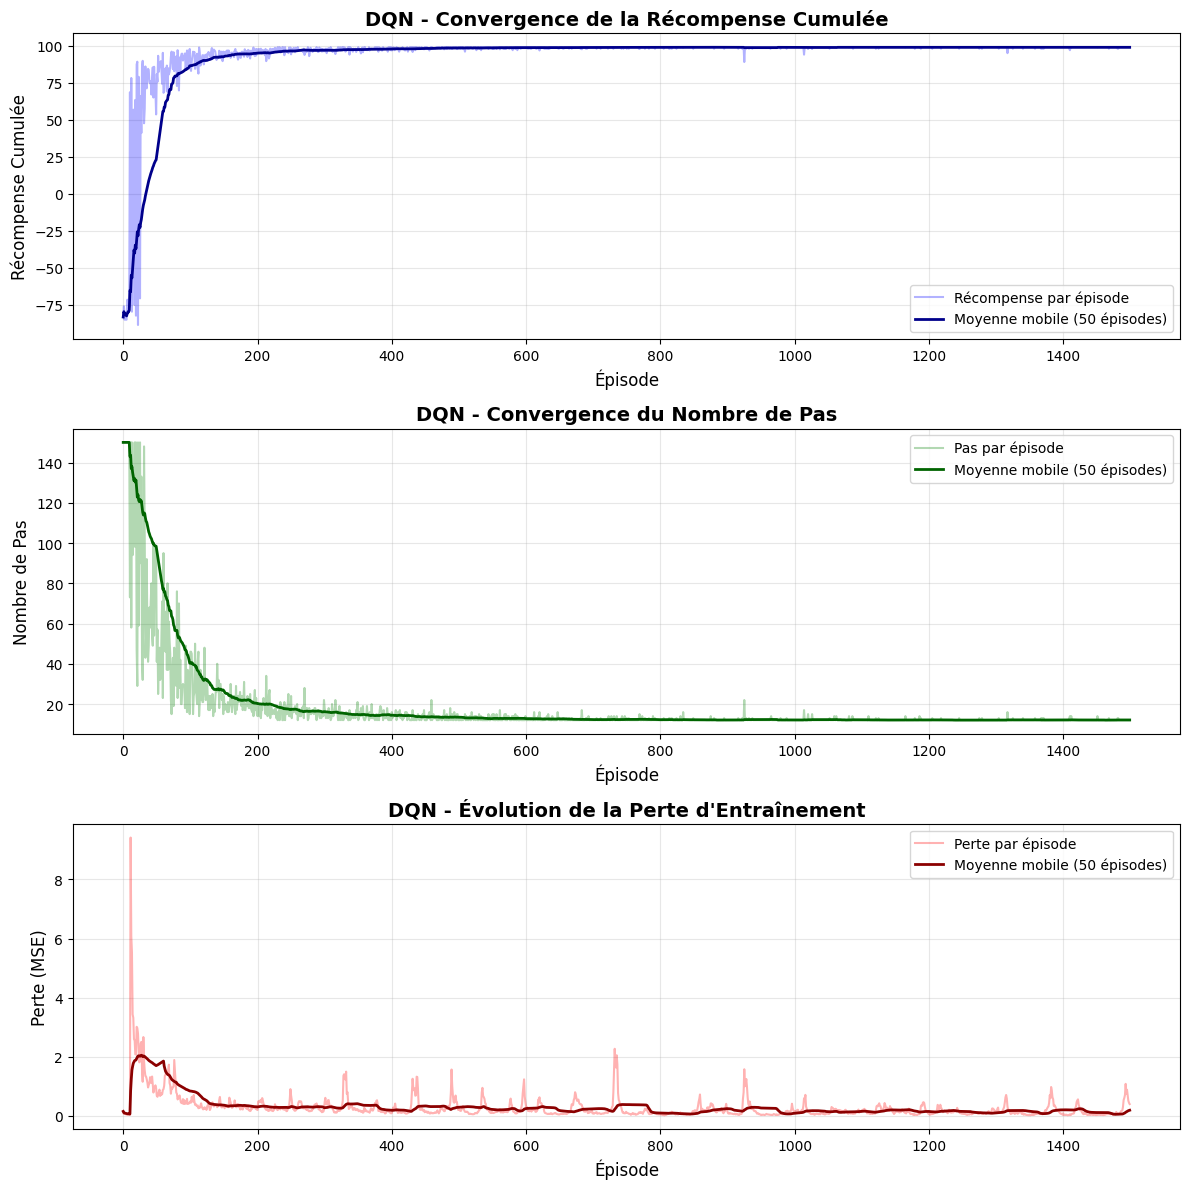


STATISTIQUES DQN
Récompense moyenne (100 derniers épisodes): 98.84
Pas moyens (100 derniers épisodes): 12.1
Perte moyenne (100 derniers épisodes): 0.1434


In [34]:
print("Courbes de convergence pour Deep Q-Learning:")

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Calculer les moyennes mobiles
window = 50
rewards_ma = pd.Series(rewards_dqn_7x7).rolling(window=window, min_periods=1).mean()
steps_ma = pd.Series(steps_dqn_7x7).rolling(window=window, min_periods=1).mean()
losses_ma = pd.Series(losses_dqn_7x7).rolling(window=window, min_periods=1).mean()

# Graphique 1: Récompense cumulée
axes[0].plot(rewards_dqn_7x7, alpha=0.3, label='Récompense par épisode', color='blue')
axes[0].plot(rewards_ma, linewidth=2, label=f'Moyenne mobile ({window} épisodes)', color='darkblue')
axes[0].set_xlabel('Épisode', fontsize=12)
axes[0].set_ylabel('Récompense Cumulée', fontsize=12)
axes[0].set_title('DQN - Convergence de la Récompense Cumulée', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2: Nombre de pas
axes[1].plot(steps_dqn_7x7, alpha=0.3, label='Pas par épisode', color='green')
axes[1].plot(steps_ma, linewidth=2, label=f'Moyenne mobile ({window} épisodes)', color='darkgreen')
axes[1].set_xlabel('Épisode', fontsize=12)
axes[1].set_ylabel('Nombre de Pas', fontsize=12)
axes[1].set_title('DQN - Convergence du Nombre de Pas', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Graphique 3: Perte d'entraînement
axes[2].plot(losses_dqn_7x7, alpha=0.3, label='Perte par épisode', color='red')
axes[2].plot(losses_ma, linewidth=2, label=f'Moyenne mobile ({window} épisodes)', color='darkred')
axes[2].set_xlabel('Épisode', fontsize=12)
axes[2].set_ylabel('Perte (MSE)', fontsize=12)
axes[2].set_title('DQN - Évolution de la Perte d\'Entraînement', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STATISTIQUES DQN")
print("="*80)
print(f"Récompense moyenne (100 derniers épisodes): {np.mean(rewards_dqn_7x7[-100:]):.2f}")
print(f"Pas moyens (100 derniers épisodes): {np.mean(steps_dqn_7x7[-100:]):.1f}")
print(f"Perte moyenne (100 derniers épisodes): {np.mean(losses_dqn_7x7[-100:]):.4f}")

### 29.7. Test de l'Agent DQN

TEST DE L'AGENT DQN ENTRAÎNÉ

Test de l'agent DQN sur grille 7x7
Position initiale: (0, 0)
Goal: (6, 6)

Résultat:
  - Goal atteint: ✓ Oui
  - Nombre de pas: 12
  - Récompense totale: 98.90


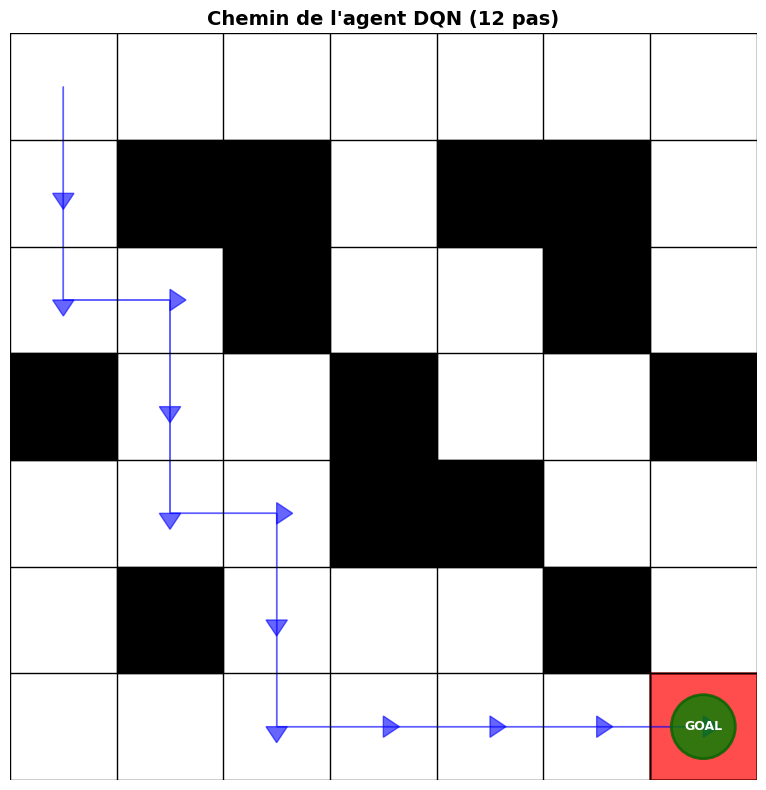

In [35]:
def test_dqn_agent(env: ParameterableGridWorld, 
                   agent: DQNAgent,
                   max_steps: int = 100):
    """Teste un agent DQN entraîné"""
    
    state = env.reset()
    state_array = np.array(state, dtype=np.float32)
    
    path = [state]
    total_reward = 0
    steps = 0
    done = False
    
    print(f"\nTest de l'agent DQN sur grille {env.grid_size}x{env.grid_size}")
    print(f"Position initiale: {state}")
    print(f"Goal: {env.goal_position}")
    
    while not done and steps < max_steps:
        # Choisir la meilleure action (exploitation pure, epsilon = 0)
        with torch.no_grad():
            state_tensor = torch.FloatTensor(state_array).unsqueeze(0).to(device)
            q_values = agent.q_network(state_tensor)
            action = q_values.argmax().item()
        
        # Exécuter l'action
        next_state, reward, done = env.step(action)
        next_state_array = np.array(next_state, dtype=np.float32)
        
        path.append(next_state)
        total_reward += reward
        steps += 1
        
        state = next_state
        state_array = next_state_array
    
    print(f"\nRésultat:")
    print(f"  - Goal atteint: {'✓ Oui' if done else '✗ Non'}")
    print(f"  - Nombre de pas: {steps}")
    print(f"  - Récompense totale: {total_reward:.2f}")
    
    # Visualiser le chemin
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    # Créer la grille
    for i in range(env.grid_size + 1):
        ax.plot([0, env.grid_size], [i, i], 'k-', linewidth=1)
        ax.plot([i, i], [0, env.grid_size], 'k-', linewidth=1)
    
    # Dessiner les obstacles
    for obs in env.obstacles:
        rect = patches.Rectangle((obs[1], env.grid_size - obs[0] - 1), 
                                 1, 1, linewidth=1, 
                                 edgecolor='black', facecolor='black')
        ax.add_patch(rect)
    
    # Dessiner le goal
    goal_rect = patches.Rectangle((env.goal_position[1], 
                                  env.grid_size - env.goal_position[0] - 1), 
                                 1, 1, linewidth=2, 
                                 edgecolor='darkred', facecolor='red', alpha=0.7)
    ax.add_patch(goal_rect)
    ax.text(env.goal_position[1] + 0.5, 
           env.grid_size - env.goal_position[0] - 0.5,
           'GOAL', ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    
    # Dessiner le chemin
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        ax.arrow(start[1] + 0.5, env.grid_size - start[0] - 0.5,
                end[1] - start[1], -(end[0] - start[0]),
                head_width=0.2, head_length=0.15, fc='blue', ec='blue', alpha=0.6)
    
    # Marquer la position finale
    final = path[-1]
    final_circle = patches.Circle((final[1] + 0.5, 
                                  env.grid_size - final[0] - 0.5), 
                                 0.3, linewidth=2, 
                                 edgecolor='darkgreen', facecolor='green', alpha=0.8)
    ax.add_patch(final_circle)
    
    ax.set_xlim(0, env.grid_size)
    ax.set_ylim(0, env.grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(f'Chemin de l\'agent DQN ({steps} pas)', 
             fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return path, total_reward, steps

# Test de l'agent DQN
print("="*80)
print("TEST DE L'AGENT DQN ENTRAÎNÉ")
print("="*80)

path_dqn, reward_dqn, steps_dqn = test_dqn_agent(env_dqn_7x7, agent_dqn_7x7)

### 29.8. Visualisation de la Politique DQN

Visualisation de la politique apprise par DQN:


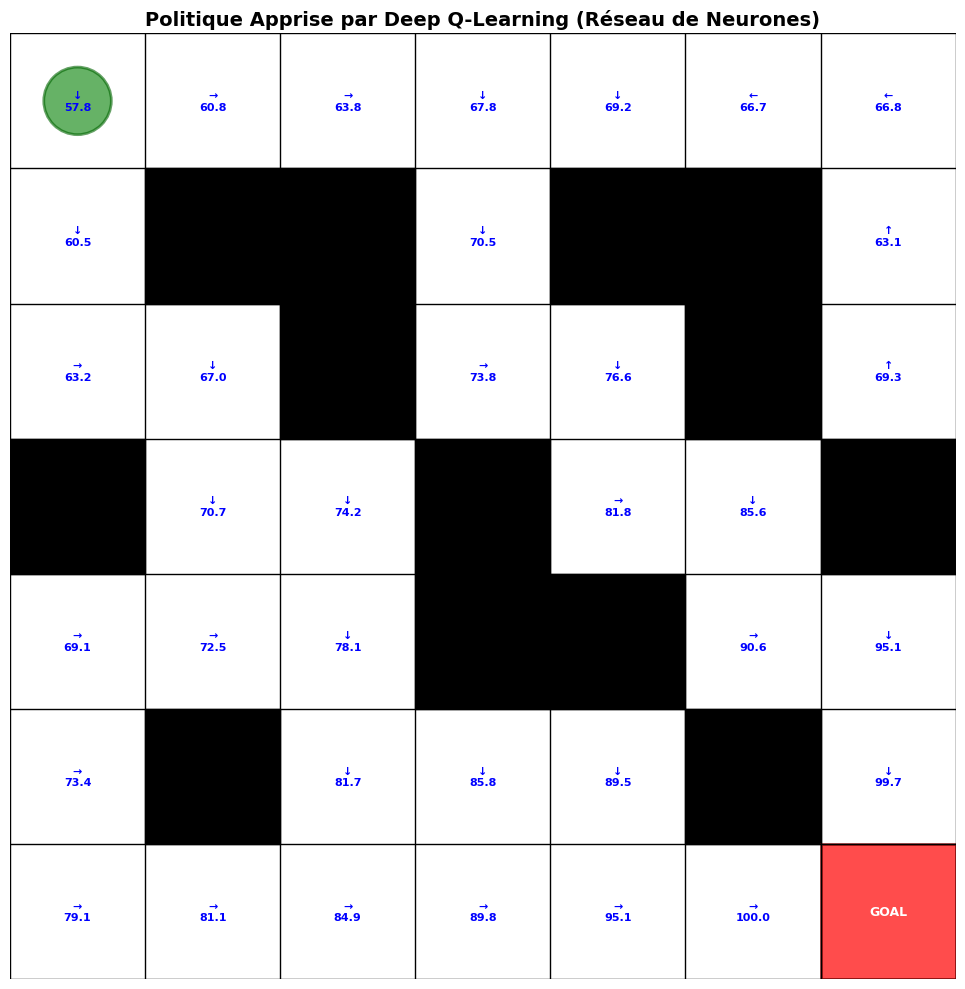

In [36]:
print("Visualisation de la politique apprise par DQN:")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Créer la grille
for i in range(env_dqn_7x7.grid_size + 1):
    ax.plot([0, env_dqn_7x7.grid_size], [i, i], 'k-', linewidth=1)
    ax.plot([i, i], [0, env_dqn_7x7.grid_size], 'k-', linewidth=1)

# Dessiner les obstacles
for obs in env_dqn_7x7.obstacles:
    rect = patches.Rectangle((obs[1], env_dqn_7x7.grid_size - obs[0] - 1), 
                             1, 1, linewidth=1, 
                             edgecolor='black', facecolor='black')
    ax.add_patch(rect)

# Dessiner le goal
goal_rect = patches.Rectangle((env_dqn_7x7.goal_position[1], 
                              env_dqn_7x7.grid_size - env_dqn_7x7.goal_position[0] - 1), 
                             1, 1, linewidth=2, 
                             edgecolor='darkred', facecolor='red', alpha=0.7)
ax.add_patch(goal_rect)
ax.text(env_dqn_7x7.goal_position[1] + 0.5, 
       env_dqn_7x7.grid_size - env_dqn_7x7.goal_position[0] - 0.5,
       'GOAL', ha='center', va='center', fontsize=9, fontweight='bold', color='white')

# Afficher les Q-values et flèches pour chaque état
with torch.no_grad():
    for i in range(env_dqn_7x7.grid_size):
        for j in range(env_dqn_7x7.grid_size):
            if (i, j) not in env_dqn_7x7.obstacles and (i, j) != env_dqn_7x7.goal_position:
                # Obtenir les Q-values du réseau
                state = np.array([i, j], dtype=np.float32)
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                q_values = agent_dqn_7x7.q_network(state_tensor)
                q_values_np = q_values.cpu().numpy()[0]
                
                # Meilleure action
                best_action = np.argmax(q_values_np)
                max_q = np.max(q_values_np)
                
                # Afficher la flèche
                arrow = env_dqn_7x7.action_names[best_action]
                ax.text(j + 0.5, env_dqn_7x7.grid_size - i - 0.5, 
                       f'{arrow}\n{max_q:.1f}',
                       ha='center', va='center', 
                       fontsize=8, color='blue', fontweight='bold')

# Marquer la position de départ
start_circle = patches.Circle((0.5, env_dqn_7x7.grid_size - 0.5), 
                             0.25, linewidth=2, 
                             edgecolor='darkgreen', facecolor='green', alpha=0.6)
ax.add_patch(start_circle)

ax.set_xlim(0, env_dqn_7x7.grid_size)
ax.set_ylim(0, env_dqn_7x7.grid_size)
ax.set_aspect('equal')
ax.axis('off')
plt.title('Politique Apprise par Deep Q-Learning (Réseau de Neurones)', 
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 29.9. Comparaison: Q-Learning Tabulaire vs Deep Q-Learning

COMPARAISON: Q-LEARNING TABULAIRE vs DEEP Q-LEARNING


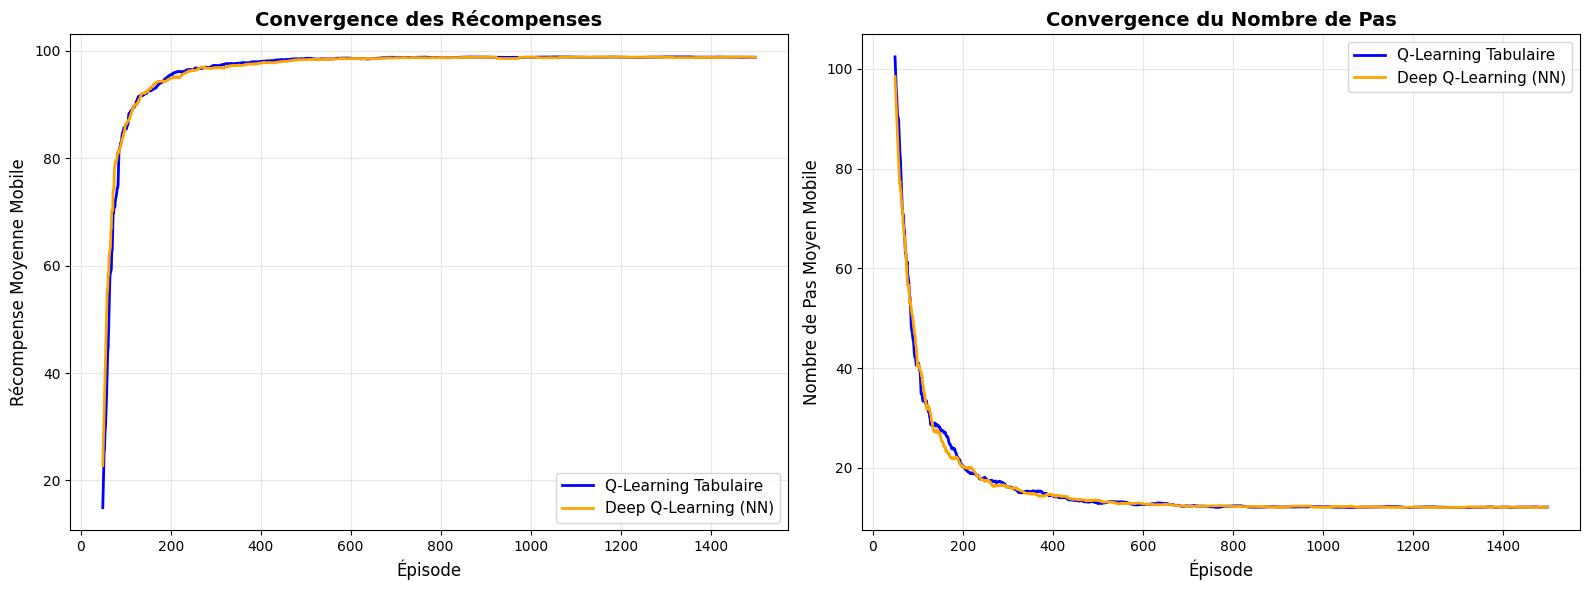


STATISTIQUES COMPARATIVES (Grille 7x7)

Q-Learning TABULAIRE:
  - Récompense moyenne finale: 98.83
  - Pas moyens finaux: 12.1
  - Écart-type récompenses: 0.24
  - Mémoire utilisée: Q-table de taille 49 × 4 = 196 valeurs

Deep Q-Learning (RÉSEAU DE NEURONES):
  - Récompense moyenne finale: 98.84
  - Pas moyens finaux: 12.1
  - Écart-type récompenses: 0.28
  - Paramètres du réseau: 25,412

AVANTAGES ET INCONVÉNIENTS

✓ Q-Learning Tabulaire:
  + Simple à implémenter
  + Converge rapidement pour petits espaces d'états
  + Solution optimale garantie avec exploration suffisante
  - Ne passe pas à l'échelle (mémoire croît exponentiellement)
  - Impossible pour espaces d'états continus

✓ Deep Q-Learning:
  + Scalable pour grands espaces d'états
  + Fonctionne avec états continus
  + Généralisation entre états similaires
  - Plus complexe à implémenter
  - Nécessite plus d'hyperparamètres à régler
  - Convergence peut être moins stable



In [37]:
print("="*80)
print("COMPARAISON: Q-LEARNING TABULAIRE vs DEEP Q-LEARNING")
print("="*80)

# Comparaison graphique
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Récompenses
window = 50
rewards_ma_tabular = pd.Series(rewards_7x7).rolling(window).mean()
rewards_ma_dqn = pd.Series(rewards_dqn_7x7).rolling(window).mean()

axes[0].plot(rewards_ma_tabular, linewidth=2, label='Q-Learning Tabulaire', color='blue')
axes[0].plot(rewards_ma_dqn, linewidth=2, label='Deep Q-Learning (NN)', color='orange')
axes[0].set_xlabel('Épisode', fontsize=12)
axes[0].set_ylabel('Récompense Moyenne Mobile', fontsize=12)
axes[0].set_title('Convergence des Récompenses', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Graphique 2: Nombre de pas
steps_ma_tabular = pd.Series(steps_7x7).rolling(window).mean()
steps_ma_dqn = pd.Series(steps_dqn_7x7).rolling(window).mean()

axes[1].plot(steps_ma_tabular, linewidth=2, label='Q-Learning Tabulaire', color='blue')
axes[1].plot(steps_ma_dqn, linewidth=2, label='Deep Q-Learning (NN)', color='orange')
axes[1].set_xlabel('Épisode', fontsize=12)
axes[1].set_ylabel('Nombre de Pas Moyen Mobile', fontsize=12)
axes[1].set_title('Convergence du Nombre de Pas', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques comparatives
print("\n" + "="*80)
print("STATISTIQUES COMPARATIVES (Grille 7x7)")
print("="*80)

print("\nQ-Learning TABULAIRE:")
print(f"  - Récompense moyenne finale: {np.mean(rewards_7x7[-100:]):.2f}")
print(f"  - Pas moyens finaux: {np.mean(steps_7x7[-100:]):.1f}")
print(f"  - Écart-type récompenses: {np.std(rewards_7x7[-100:]):.2f}")
print(f"  - Mémoire utilisée: Q-table de taille {7*7} × 4 = {7*7*4} valeurs")

print("\nDeep Q-Learning (RÉSEAU DE NEURONES):")
print(f"  - Récompense moyenne finale: {np.mean(rewards_dqn_7x7[-100:]):.2f}")
print(f"  - Pas moyens finaux: {np.mean(steps_dqn_7x7[-100:]):.1f}")
print(f"  - Écart-type récompenses: {np.std(rewards_dqn_7x7[-100:]):.2f}")

# Compter les paramètres du réseau
total_params = sum(p.numel() for p in agent_dqn_7x7.q_network.parameters())
print(f"  - Paramètres du réseau: {total_params:,}")

print("\n" + "="*80)
print("AVANTAGES ET INCONVÉNIENTS")
print("="*80)

print("\n✓ Q-Learning Tabulaire:")
print("  + Simple à implémenter")
print("  + Converge rapidement pour petits espaces d'états")
print("  + Solution optimale garantie avec exploration suffisante")
print("  - Ne passe pas à l'échelle (mémoire croît exponentiellement)")
print("  - Impossible pour espaces d'états continus")

print("\n✓ Deep Q-Learning:")
print("  + Scalable pour grands espaces d'états")
print("  + Fonctionne avec états continus")
print("  + Généralisation entre états similaires")
print("  - Plus complexe à implémenter")
print("  - Nécessite plus d'hyperparamètres à régler")
print("  - Convergence peut être moins stable")

print("\n" + "="*80)

### 29.10. Sauvegarde du Modèle DQN

In [38]:
# Sauvegarder le modèle DQN
model_path = 'dqn_model_7x7.pth'
torch.save({
    'q_network_state_dict': agent_dqn_7x7.q_network.state_dict(),
    'target_network_state_dict': agent_dqn_7x7.target_network.state_dict(),
    'optimizer_state_dict': agent_dqn_7x7.optimizer.state_dict(),
    'epsilon': agent_dqn_7x7.epsilon,
    'grid_size': 7,
    'training_episodes': len(rewards_dqn_7x7)
}, model_path)

print(f"✓ Modèle DQN sauvegardé dans '{model_path}'")

# Créer également un CSV avec les statistiques d'entraînement
df_dqn_stats = pd.DataFrame({
    'Episode': range(1, len(rewards_dqn_7x7) + 1),
    'Reward': rewards_dqn_7x7,
    'Steps': steps_dqn_7x7,
    'Loss': losses_dqn_7x7
})

stats_path = 'dqn_training_stats_7x7.csv'
df_dqn_stats.to_csv(stats_path, index=False)
print(f"✓ Statistiques d'entraînement sauvegardées dans '{stats_path}'")

# Afficher un résumé
print("\n" + "="*80)
print("RÉSUMÉ DU MODÈLE DQN")
print("="*80)
print(f"\nArchitecture du réseau:")
print(agent_dqn_7x7.q_network)
print(f"\nNombre total de paramètres: {sum(p.numel() for p in agent_dqn_7x7.q_network.parameters()):,}")
print(f"Épisodes d'entraînement: {len(rewards_dqn_7x7)}")
print(f"Performance finale: {np.mean(rewards_dqn_7x7[-100:]):.2f} récompense moyenne")

# Fonction pour charger le modèle
print("\n" + "="*80)
print("EXEMPLE DE CHARGEMENT DU MODÈLE")
print("="*80)
print("""
Pour charger le modèle plus tard:

# Créer un nouvel agent
new_agent = DQNAgent(state_size=2, action_size=4)

# Charger les poids
checkpoint = torch.load('dqn_model_7x7.pth')
new_agent.q_network.load_state_dict(checkpoint['q_network_state_dict'])
new_agent.target_network.load_state_dict(checkpoint['target_network_state_dict'])
new_agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
new_agent.epsilon = checkpoint['epsilon']

# Utiliser le modèle pour l'inférence
new_agent.q_network.eval()
""")

✓ Modèle DQN sauvegardé dans 'dqn_model_7x7.pth'
✓ Statistiques d'entraînement sauvegardées dans 'dqn_training_stats_7x7.csv'

RÉSUMÉ DU MODÈLE DQN

Architecture du réseau:
QNetwork(
  (fc1): Linear(in_features=2, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=4, bias=True)
)

Nombre total de paramètres: 25,412
Épisodes d'entraînement: 1500
Performance finale: 98.84 récompense moyenne

EXEMPLE DE CHARGEMENT DU MODÈLE

Pour charger le modèle plus tard:

# Créer un nouvel agent
new_agent = DQNAgent(state_size=2, action_size=4)

# Charger les poids
checkpoint = torch.load('dqn_model_7x7.pth')
new_agent.q_network.load_state_dict(checkpoint['q_network_state_dict'])
new_agent.target_network.load_state_dict(checkpoint['target_network_state_dict'])
new_agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
new_agent.epsilon = checkpo